# NGC 4725 (UGC 7989)

Галактика найдена из пересечения HYPERLEDA и https://arxiv.org/pdf/1608.06735v1.pdf.

In [1]:
from IPython.display import HTML
from IPython.display import Image
import os

%pylab
%matplotlib inline
%run ../../utils/load_notebook.py

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
from photometry import *

importing Jupyter notebook from photometry.ipynb
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
from instabilities import *

importing Jupyter notebook from instabilities.ipynb
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [4]:
from utils import *

importing Jupyter notebook from utils.ipynb


In [5]:
name = 'N4725'
gtype = 'SABa' #LEDA, 'SBbc' from Heraudeau98
incl = 50.  #mean value
distance = 18.2 # Noordermeer
scale = 0.088 #kpc/arcsec according to Noordermeer

data_path = '../../data/n4725_u7989'
sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

In [6]:
%%javascript 
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h2 id="tocheading">Оглавление</h2>
<div id="toc"></div>

## Статьи

TODO: add arcticles

## Разное

In [7]:
os.chdir(data_path)

# Данные из NED
HTML('<iframe src=http://ned.ipac.caltech.edu/cgi-bin/objsearch?objname=ngc+4725&extend=no&hconst=\
73&omegam=0.27&omegav=0.73&corr_z=1&out_csys=Equatorial&out_equinox=J2000.0&obj_sort=RA+or+Longitude&of=pre_text&zv_breaker=\
30000.0&list_limit=5&img_stamp=YES width=1000 height=350></iframe>')

In [8]:
# Данные из HYPERLEDA
HTML('<iframe src=http://leda.univ-lyon1.fr/ledacat.cgi?o=ngc4725 width=1000 height=350></iframe>')

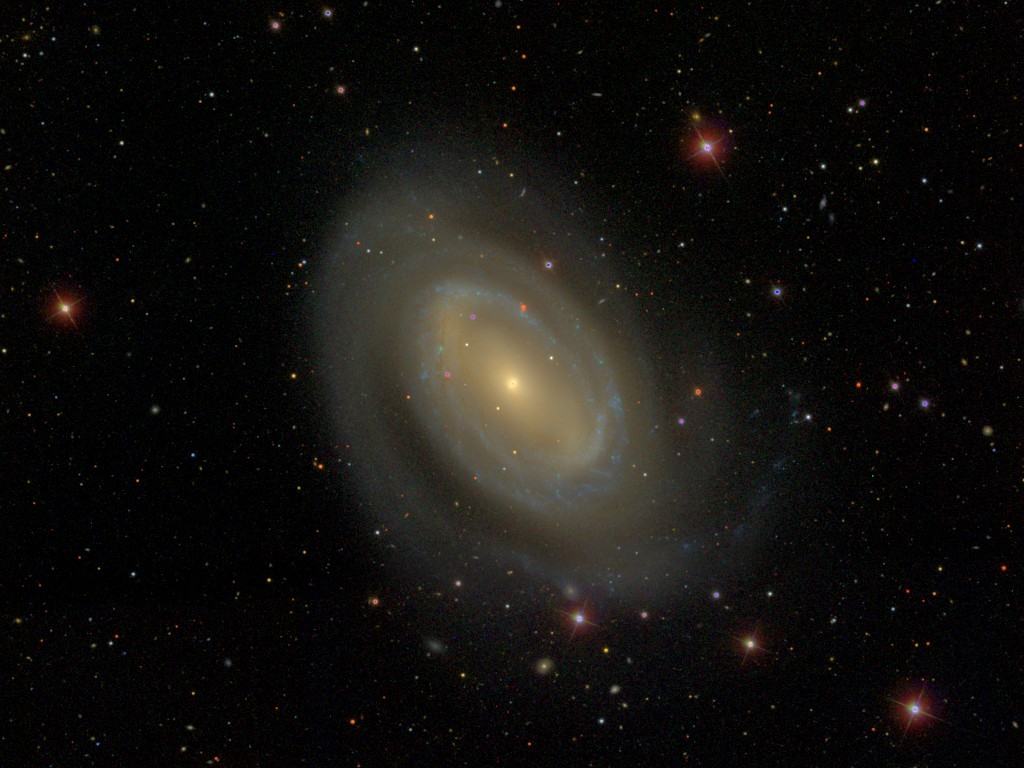

In [9]:
#SDSS
Image('n4725_SDSS.jpg', width=500)

Проблема в том, что эта галактика есть в DR7, но в более поздних релихах я не смог ее найти, соответственно не знаю масштаба корректного. 

Однако я понял, что сама картинка из выборки http://cosmo.nyu.edu/hogg/rc3/ и там есть с маштабом изображение:

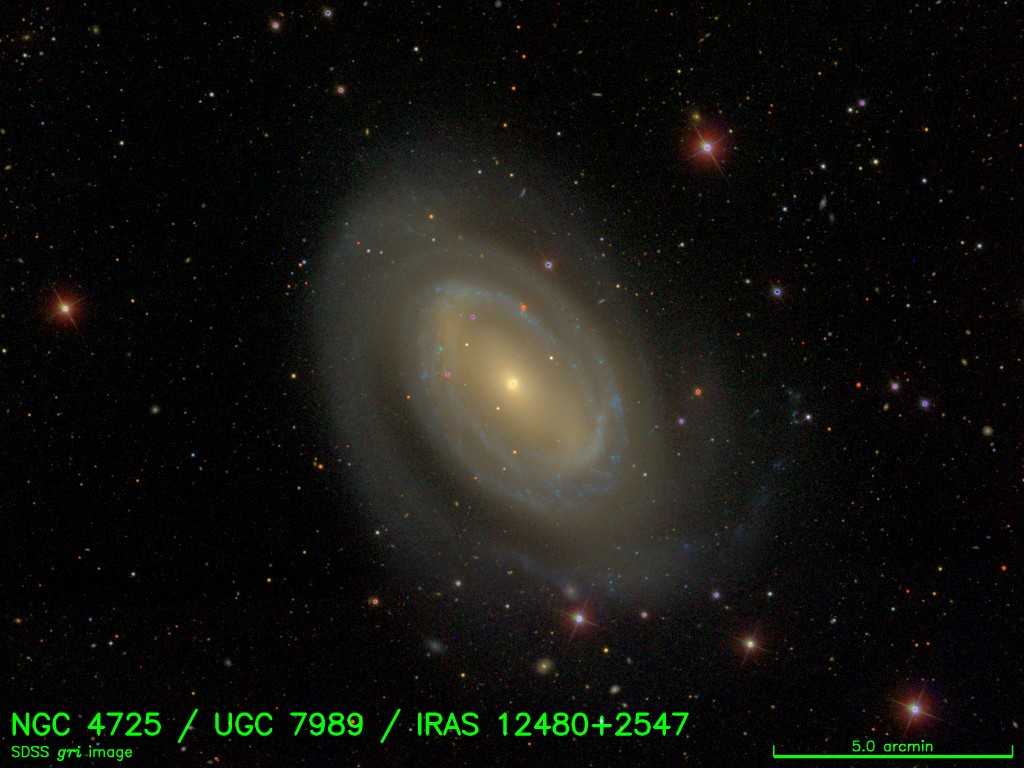

In [10]:
Image('n4725_SDSS_labeled.jpg', width=500)

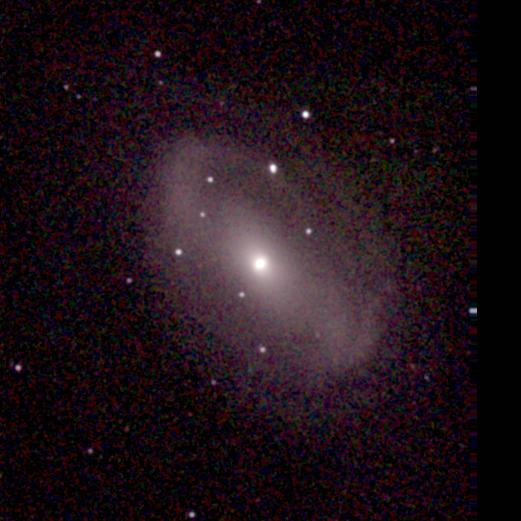

In [11]:
#JHK
Image('n4725_2MASS.jpg', width=300)

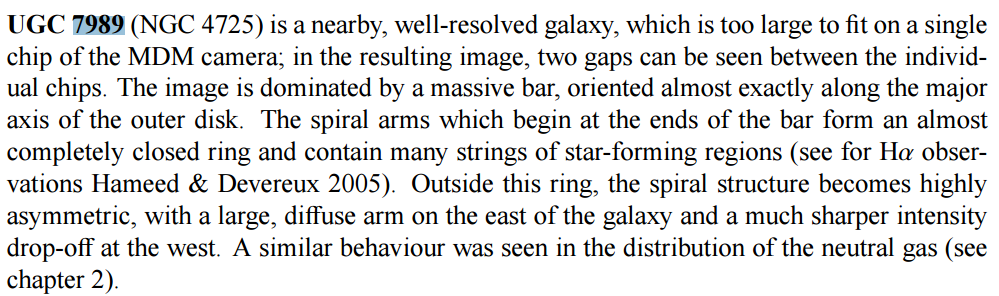

In [12]:
Image('noord_p113_cite.png')

## Кинематические данные по звездам

Дисперсии скоростей и кривая вращения - есть в Heraudeau 1999 http://adsabs.harvard.edu/cgi-bin/bib_query?1999A%26AS..136..509H до ~50'' (1 разрез), PA=$35^{\circ}$

#TODO: понять, исправлено ли за наклон

### Кривая вращения

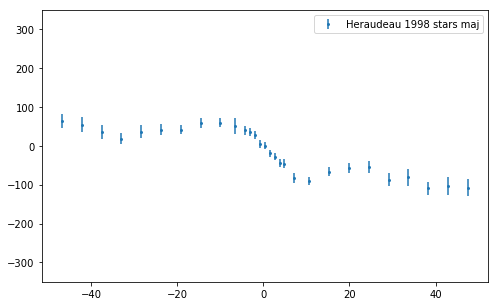

In [13]:
# Данные по звездной кинематике Heraudeau+1999 вдоль большой полуоси (не исправленные за наклон?) - из HYPERLEDA
r_ma, vel_ma, e_vel_ma, sig_ma, e_sig_ma = zip(*np.loadtxt("her99_kinem.dat", float))

fig = plt.figure(figsize=[8,5])
plt.errorbar(r_ma, vel_ma, e_vel_ma, fmt='.', marker='.', mew=0, label="Heraudeau 1998 stars maj")
plt.legend()
plt.ylim(-350., 350.)
plt.show()

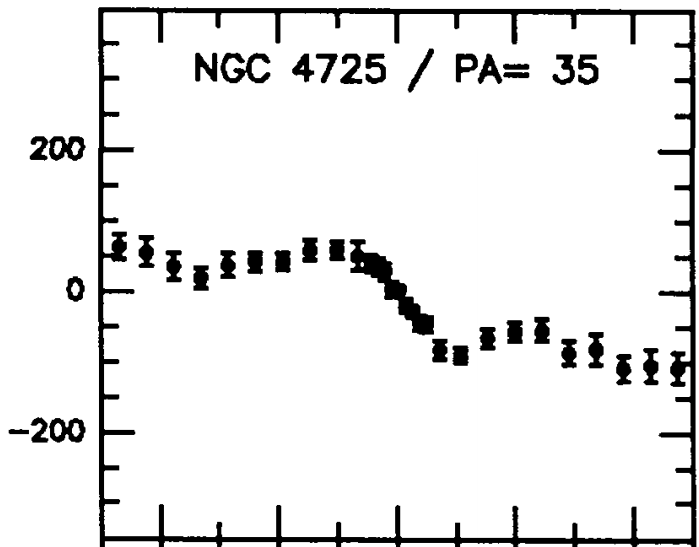

In [14]:
Image('her99_rot.png') #оригинал

Приближение:

In [15]:
r_ma_b, vel_ma_b, e_vel_b = zip(*sorted(zip(np.abs(r_ma), np.abs(vel_ma), e_vel_ma)))

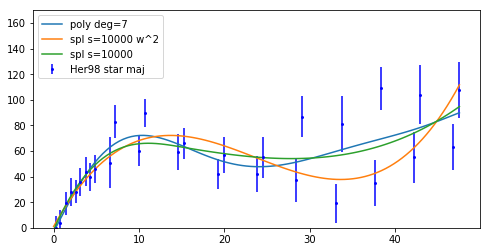

In [16]:
fig = plt.figure(figsize=[8,4])
plt.errorbar(r_ma_b, vel_ma_b, yerr=e_vel_b, fmt='.', marker='.', mew=0, color='blue', label = 'Her98 star maj')

test_points = np.linspace(0.0, max(r_ma_b), 100)

poly_star = poly1d(polyfit(r_ma_b, vel_ma_b, deg=7))
plt.plot(test_points, poly_star(test_points), '-', label='poly deg=7')

def w(arr):
    return map(lambda l: 1/(1. + l**2), arr)

import scipy.interpolate as inter

spl = inter.UnivariateSpline(r_ma_b, vel_ma_b, k=3, s=10000., w=w(e_vel_b))
plt.plot(test_points, spl(test_points), '-', label='spl s=10000 w^2')

spl = inter.UnivariateSpline(r_ma_b, vel_ma_b, k=3, s=10000.)
plt.plot(test_points, spl(test_points), '-', label='spl s=10000')

plt.legend(loc='upper left')
plt.ylim(0, 170)
plt.show()

C весами плохо получается, полином и обычный почти совпадают - берем их:

In [17]:
star_approx = spl

### Дисперсии

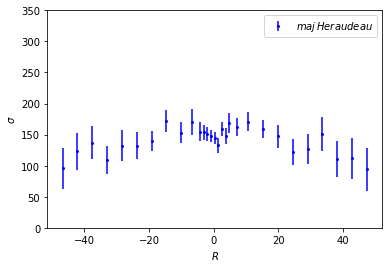

In [18]:
r_sig_ma = r_ma #Heraudeau+1999

fig = plt.figure(figsize=[6., 4.])
plt.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='blue', label=r'$maj\, Heraudeau $')

plt.xlabel('$R$')
plt.ylabel('$\sigma$')
plt.ylim(0, 350)
plt.legend();

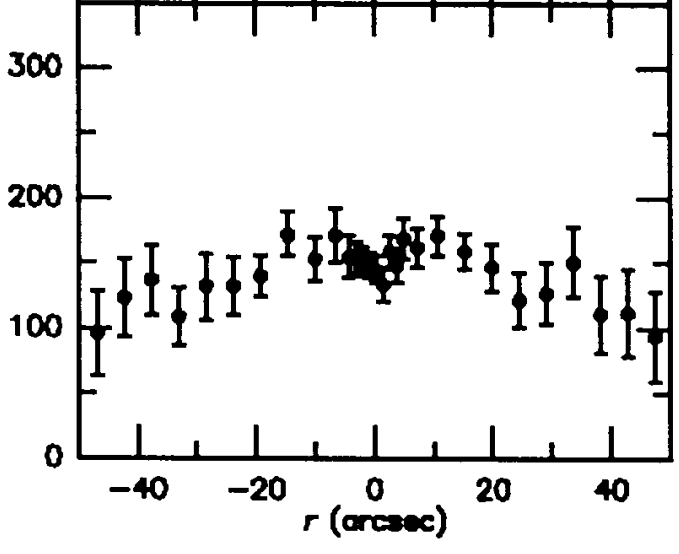

In [19]:
Image('her99_disp.png') #из статьи

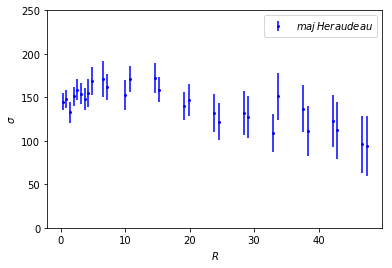

In [20]:
fig = plt.figure(figsize=[6., 4.])
plt.errorbar(map(abs, r_sig_ma), sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='blue', label=r'$maj\, Heraudeau $')
plt.xlabel('$R$')
plt.ylabel('$\sigma$')
plt.ylim(0, 250)
plt.legend();

Для большой оси: $\sigma^2_{maj} = \sigma^2_{\varphi}\sin^2 i + \sigma^2_{z}\cos^2 i$, следовательно примерные ограничения
$$\sigma_{maj}  < \frac{\sigma_{maj}}{\sqrt{\sin^2 i + 0.49\cos^2 i}}< \sigma_R = \frac{\sigma_{maj}}{\sqrt{f\sin^2 i + \alpha^2\cos^2 i}} ~< \frac{\sigma_{maj}}{\sqrt{0.5\sin^2 i + 0.09\cos^2 i}} < \frac{\sqrt{2}\sigma_{maj}}{\sin i} (или \frac{\sigma_{maj}}{\sqrt{f}\sin i}),$$ 
или можно более точную оценку дать, если построить $f$ (сейчас $0.5 < f < 1$).

Для малой оси: $\sigma^2_{min} = \sigma^2_{R}\sin^2 i + \sigma^2_{z}\cos^2 i$ и ограничения
$$\sigma_{min} < \frac{\sigma_{min}}{\sqrt{\sin^2 i + 0.49\cos^2 i}} < \sigma_R = \frac{\sigma_{min}}{\sqrt{\sin^2 i + \alpha^2\cos^2 i}} ~< \frac{\sigma_{min}}{\sqrt{\sin^2 i + 0.09\cos^2 i}} < \frac{\sigma_{min}}{\sin i}$$ 

Соответственно имеем 5 оценок из maj и 4 оценки из min.

У нас только большая ось - все оценки из нее:

In [21]:
spl_maj = inter.UnivariateSpline(r_sig_ma, sig_ma, k=3, s=10000.)
sig_maj_lim = max(r_sig_ma)

points = np.linspace(0.1, max(r_ma)+15., 100)

In [22]:
# TODO: move to external file

def flat_end(argument):
    '''декоратор для того, чтобы продолжать функцию на уровне последнего значения'''
    def real_decorator(function):
        def wrapper(*args, **kwargs):
            if args[0] < argument:
                return function(*args, **kwargs)
            else:
                return function(argument, *args[1:], **kwargs)
        return wrapper
    return real_decorator

@flat_end(sig_maj_lim)
def sig_R_maj_minmin(r, spl_maj=spl_maj):
    return spl_maj(r).item()

@flat_end(sig_maj_lim)
def sig_R_maj_min(r, spl_maj=spl_maj):
    return spl_maj(r).item()/sqrt(sin_i**2 + 0.49*cos_i**2)
    
@flat_end(sig_maj_lim)
def sig_R_maj_max(r, spl_maj=spl_maj):
    return spl_maj(r).item()/sqrt(0.5*sin_i**2 + 0.09*cos_i**2)

@flat_end(sig_maj_lim)
def sig_R_maj_maxmax(r, spl_maj=spl_maj):
    return spl_maj(r)*sqrt(2)/sin_i
    
@flat_end(sig_maj_lim)
def sig_R_maj_maxmaxtrue(r, spl_maj=spl_maj):
    return spl_maj(r)/sin_i/sqrt(sigPhi_to_sigR_real(r))

Используем соотношение $\sigma_{\varphi}^{2}/\sigma_{R}^{2}$, которое описывается уравнением ${\displaystyle \sigma_{\varphi}^{2}/\sigma_{R}^{2}=0.5\left(1+\frac{R}{\bar{v}_{\varphi}}\frac{d\bar{v}_{\varphi}}{dR}\right)}$ (Binney & Tremaine, 1987)

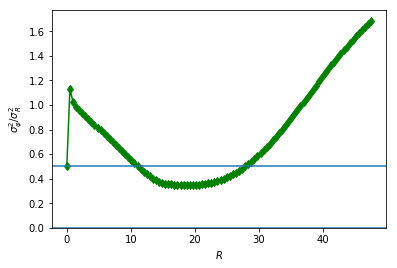

In [23]:
def sigPhi_to_sigR_real(R):
        return 0.5 * (1 + R*star_approx.derivative()(R) / star_approx(R))

plt.plot(test_points, [sigPhi_to_sigR_real(R) for R in test_points], 'd-', color='green')
plt.axhline(y=0.5)
plt.axhline(y=0.0)
plt.xlabel('$R$')
plt.ylabel(r"$\sigma_{\varphi}^2/\sigma_{R}^2$")
plt.ylim(0);

Т.к. насчет малой оси я не уверен - приближения делаем по большой.

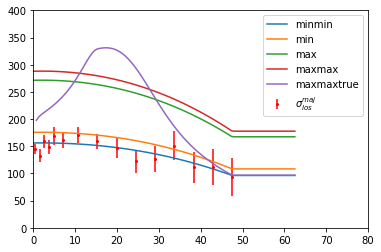

In [24]:
plt.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
plt.plot(points, map(sig_R_maj_minmin, points), label = 'minmin')
plt.plot(points, map(sig_R_maj_min, points), label = 'min')
plt.plot(points, map(sig_R_maj_max, points), label = 'max')
plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maxmax')
plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maxmaxtrue')

plt.legend()
plt.ylim(0,400)
plt.xlim(0,80);

Видно, что настоящее еще и больше.

## Данные по газу

### Кривая вращения

* есть у Ноордермеера в виде точек на карте (но не в тезисах, а в статье http://adsabs.harvard.edu/cgi-bin/bib_query?2005A%26A...442..137N) $\rm{HI}$
* есть тут http://www.aanda.org/articles/aa/pdf/2011/06/aa16177-10.pdf (тоже WHISP $\rm{HI}$)

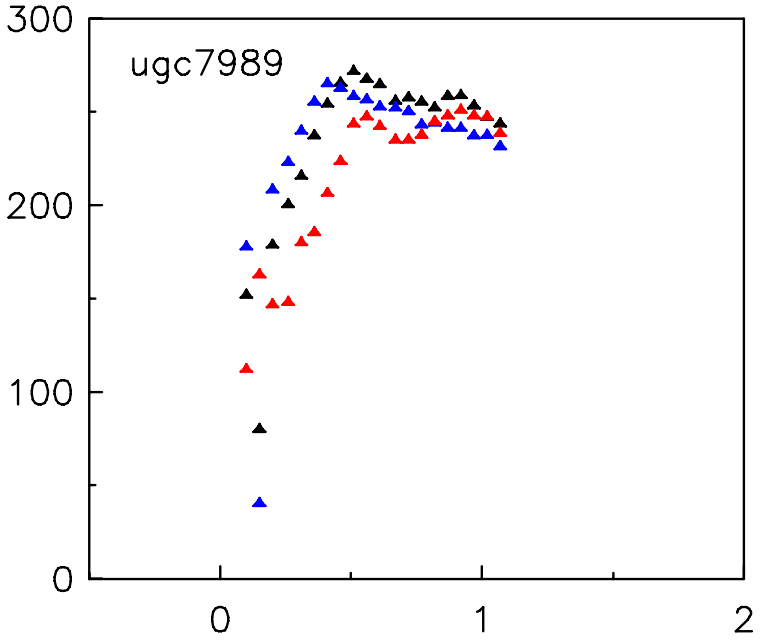

In [25]:
Image('HI_rot.png') #HI WHISP from van Eymeren 2011, PA=32.45, R25=25.91kpc, разные цвета - это две стороны, черная - усредненная

Достаточно странно расположились черные точки - не между двумя другими, выглядит неверным

(-0.5, 2.0)

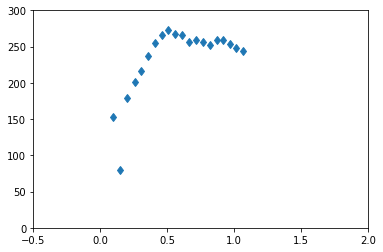

In [26]:
R25 = 25.91

# Данные по кинематике газа van Eymeren 2011 в HI
r_hi, vel_hi = zip(*np.loadtxt("HI_rot.dat", float, delimiter=','))
plt.plot(r_hi, vel_hi, 'd', label='HI Eymeren+2011')
plt.ylim(0, 300)
plt.xlim(-0.5, 2.)

Из Ноордермеера:

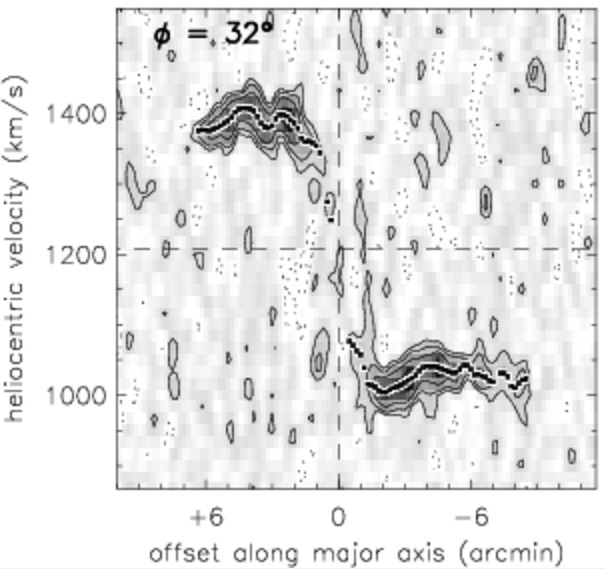

In [27]:
Image('noord_rot.png')

(-10.0, 11.0)

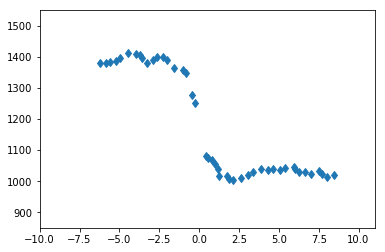

In [28]:
r_n, vel_n = zip(*np.loadtxt("noord_rot.dat", float, delimiter=','))
plt.plot(r_n, vel_n, 'd', label='HI Noord+2005')
plt.ylim(850, 1550)
plt.xlim(-10., 11.)

In [29]:
vel_n = map(lambda l: l-1208., vel_n)
r_n, vel_n = zip(*sorted(zip(np.abs(r_n), np.abs(vel_n))))
r_n = [l*60 for l in r_n]

Посмотрим на согласие между измерениями:

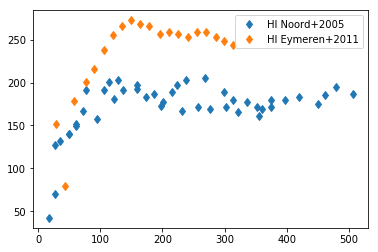

In [30]:
plt.plot(r_n, vel_n, 'd', label='HI Noord+2005')
plt.plot([l*R25/calc_scale(18.2) for l in r_hi], vel_hi, 'd', label='HI Eymeren+2011')
plt.legend();

Похоже, что у Ноордермеера не нормировано на угол. Проверим:

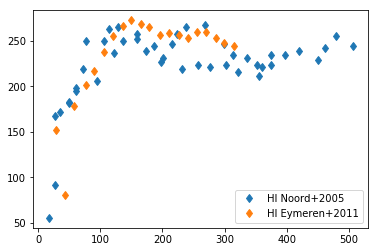

In [31]:
plt.plot(r_n, [l/sin_i for l in vel_n], 'd', label='HI Noord+2005')
plt.plot([l*R25/scale for l in r_hi], vel_hi, 'd', label='HI Eymeren+2011')
plt.legend(loc='lower right');

Да, так и есть - данные хорошо совпали для исправленных за угол измерений Ноордермеера (даже для такой низкой точности снятия данных с рисунка). Странно, что у более новых данных протяженность значительно меньше. Для построения кривой возьмем более оба набора до $200^{''}$: 

In [32]:
r_hi = [l*R25/calc_scale(18.2) for l in r_hi]
vel_n = [l/sin_i for l in vel_n]

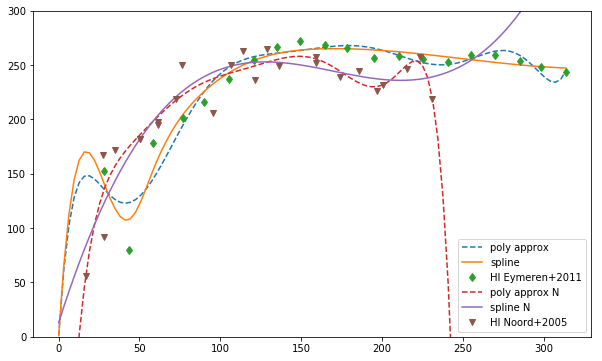

In [33]:
fig = plt.figure(figsize=[10,6])
_1,_2, = [0.0,],[0.0,]
_1.extend(r_hi)
_2.extend(vel_hi)
_1,_2 = zip(*sorted(zip(_1,_2)))

gas_approx = poly1d(polyfit(_1, _2, deg=9))
test_points = np.linspace(0, max(r_hi), 100)
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx')

spl_gas = inter.UnivariateSpline(_1, _2, k=3, s=2000.)
plt.plot(test_points, spl_gas(test_points), '-', label='spline')

plt.plot(r_hi, vel_hi, 'd', label='HI Eymeren+2011')

gas_approx = poly1d(polyfit(r_n[:-20], vel_n[:-20], deg=9))
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx N')

spl_gas = inter.UnivariateSpline(r_n[:-20], vel_n[:-20], k=3, s=10000.)
plt.plot(test_points, spl_gas(test_points), '-', label='spline N')

plt.plot(r_n[:-20], vel_n[:-20], 'v', label='HI Noord+2005')


plt.ylim(0, 300)
plt.legend(loc='lower right');

Похоже для данных Eymeren вторая точка все портит и вообще точность в нужной нам области хромает.

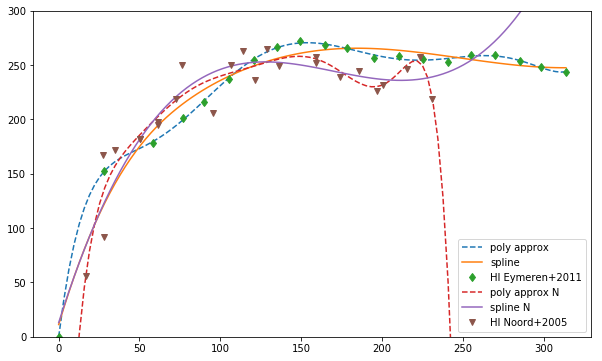

In [34]:
fig = plt.figure(figsize=[10,6])
_1,_2, = [0.0,],[0.0,]
_1.extend(r_hi[1:])
_2.extend(vel_hi[1:])
_1,_2 = zip(*sorted(zip(_1,_2)))

gas_approx = poly1d(polyfit(_1, _2, deg=9))
test_points = np.linspace(0, max(r_hi), 100)
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx')

spl_gas = inter.UnivariateSpline(_1, _2, k=3, s=2000.)
plt.plot(test_points, spl_gas(test_points), '-', label='spline')

plt.plot(_1, _2, 'd', label='HI Eymeren+2011')

gas_approx = poly1d(polyfit(r_n[:-20], vel_n[:-20], deg=9))
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx N')

spl_gas_N = inter.UnivariateSpline(r_n[:-20], vel_n[:-20], k=3, s=10000.)
plt.plot(test_points, spl_gas_N(test_points), '-', label='spline N')

plt.plot(r_n[:-20], vel_n[:-20], 'v', label='HI Noord+2005')


plt.ylim(0, 300)
plt.legend(loc='lower right');

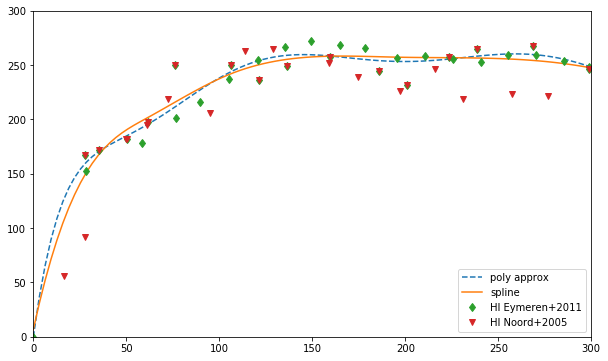

In [35]:
fig = plt.figure(figsize=[10,6])
_1,_2, = [0.0,],[0.0,]
_1.extend(r_hi[1:])
_1.extend(r_n[1::2])
_2.extend(vel_hi[1:])
_2.extend(vel_n[1::2])
_1,_2 = zip(*sorted(zip(_1,_2)))

gas_approx = poly1d(polyfit(_1, _2, deg=9))
test_points = np.linspace(0, max(r_hi), 100)
plt.plot(test_points, gas_approx(test_points), '--', label='poly approx')

spl_gas = inter.UnivariateSpline(_1, _2, k=3, s=5000.)
plt.plot(test_points, spl_gas(test_points), '-', label='spline')

plt.plot(_1, _2, 'd', label='HI Eymeren+2011')
plt.plot(r_n, vel_n, 'v', label='HI Noord+2005')


plt.ylim(0, 300)
plt.xlim(0, 300)
plt.legend(loc='lower right');

Если убрать эту точку - то сплайны почти совпадают, но все равно точность недостаточная.

TODO: поискать более точные данные - например CO

### Эпициклическая частота

Для случая бесконечного тонкого диска: $$\kappa=\frac{3}{R}\frac{d\Phi}{dR}+\frac{d^2\Phi}{dR^2}$$
где $\Phi$ - гравпотенциал, однако его знать не надо, т.к. есть проще формула: $$\kappa=\sqrt{2}\frac{\vartheta_c}{R}\sqrt{1+\frac{R}{\vartheta_c}\frac{d\vartheta_c}{dR}}$$

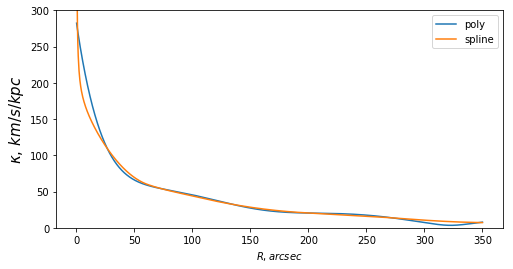

In [36]:
test_points = np.linspace(0, 350, 1000)
fig = plt.figure(figsize=[8, 4])
plt.plot(test_points, [epicyclicFreq_real(gas_approx, x, scale) for x in test_points], '-', label='poly')
plt.plot(test_points, [epicyclicFreq_real(spl_gas, x, scale) for x in test_points], '-', label='spline')
# plt.plot(test_points, [epicyclicFreq_real(spl_gas_N, x, scale) for x in test_points], '-', label='spline N')
plt.xlabel('$R, arcsec$')
plt.ylabel('$\kappa,\, km/s/kpc$', fontsize=15)
plt.ylim(0, 300)
plt.legend();

Достаточно сложно, учитывая что нас интересуют первые 50 секунд. Будем считать, что нас интересуют сплайны.

### Поверхностная плотность газа 

* $\Sigma_{HI}$ и $\Sigma_{H_2}$ https://arxiv.org/pdf/1608.06735v1.pdf Yim, Hulst 2016
* $\Sigma_{HI}$ из Ноордермеера

(необходимо иметь в виду, что в первой работе общий профиль исправлен за гелий следующим образом $\Sigma_g = 1.36\times(\Sigma_{H_2} + \Sigma_{HI})$ и переход CO-to-H2 тоже конкретный)

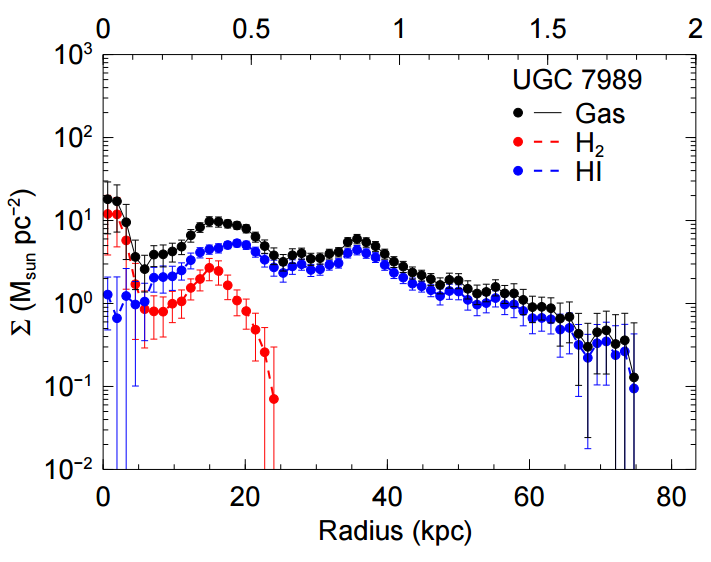

In [37]:
Image('u7989_gas_dens.png')

In [38]:
# у них расстояние в работе 26.8
gas_scale = calc_scale(26.8)
print gas_scale

0.129930204938


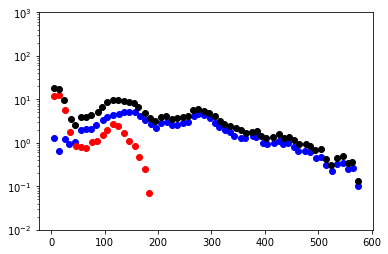

In [39]:
r_g_dens, gas_dens = zip(*np.loadtxt("gas_dens.dat", float, delimiter=','))

plt.semilogy([l/gas_scale for l in r_g_dens[:58]], gas_dens[:58], 'o', color='blue')
plt.semilogy([l/gas_scale for l in r_g_dens[58:77]], gas_dens[58:77], 'o', color='red')
plt.semilogy([l/gas_scale for l in r_g_dens[77:]], gas_dens[77:], 'o', color='black')
plt.ylim(0.01, 1000);

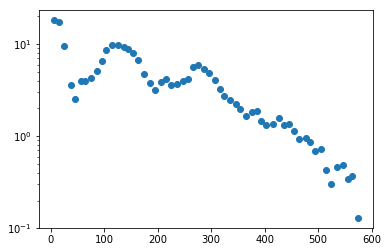

In [40]:
plt.semilogy([l/gas_scale for l in r_g_dens[77:]], gas_dens[77:], 'o');

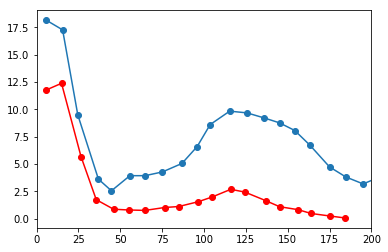

In [41]:
plt.plot([l/gas_scale for l in r_g_dens[58:77]], gas_dens[58:77], '-o', color='r')
plt.plot([l/gas_scale for l in r_g_dens[77:]], gas_dens[77:], '-o') #только сумма
plt.xlim(0, 200);

Ноордермеер:

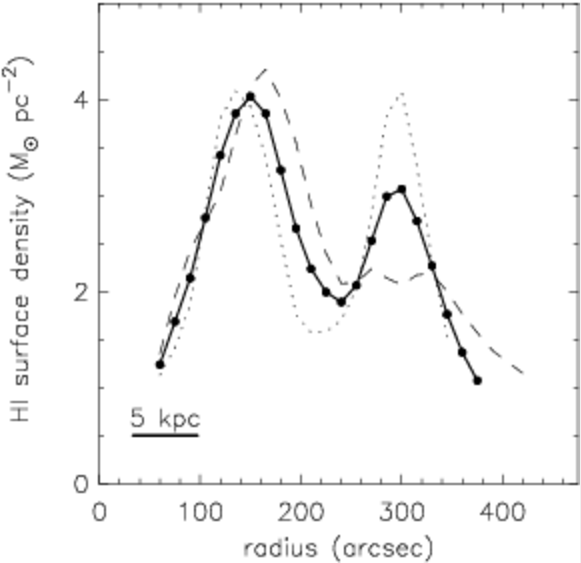

In [42]:
Image('noord_gdens.png')

In [43]:
r_g_n, gas_dens_n = zip(*np.loadtxt("HI_dens.dat", float, delimiter=','))

(0, 5)

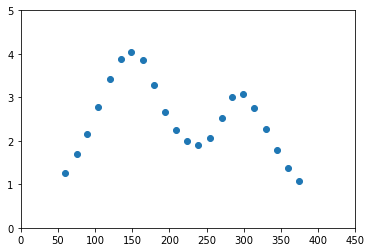

In [44]:
plt.plot(r_g_n, gas_dens_n, 'o')
plt.xlim(0, 450)
plt.ylim(0, 5)

Сравнение:

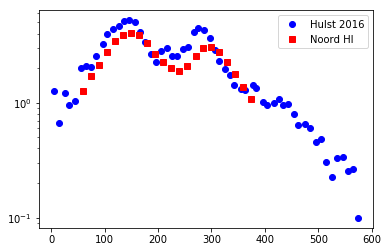

In [45]:
plt.semilogy([l/gas_scale for l in r_g_dens[:58]], gas_dens[:58], 'o', color='blue', label='Hulst 2016')
plt.semilogy(r_g_n, gas_dens_n, 's', label='Noord HI', color='red')
plt.legend()

Как и было изначально видно - пики заметно смещены (**теперь нет, т.к. я это учел**)

Разгадка кроется, кмк, в том что в работе 2016 года расстояние взято равным 26.8 Мпк, а в NED это соответствует (Virgo + GA + Shapley) и масштаб 0.130 kpc/arcseс.

Также это подтерждается сравнением с верхней шкалой на рисунке, где $R/R_{25}$, $R_{25}=321.^{"}$ и примерно по соотношенияю можно оценить

$$20.5\,kpc/(0.5*321)\,arcsec = 0.1308\, kpc/arcsec$$

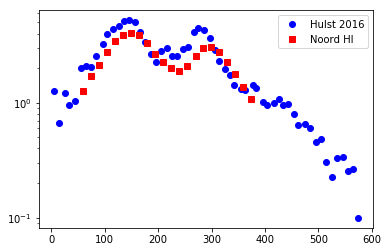

In [46]:
plt.semilogy([l/0.130 for l in r_g_dens[:58]], gas_dens[:58], 'o', color='blue', label='Hulst 2016')
plt.semilogy(r_g_n, gas_dens_n, 's', label='Noord HI', color='red')
plt.legend();

И теперь с учетом спирали они стали похожи друг на друга.

Используем более современный газ $\rm{HI}$ + $\rm{HII}$:

In [47]:
r_HI_dens, HI_dens = [l/gas_scale for l in r_g_dens[:58]], gas_dens[:58]
r_mol_dens, mol_dens = [l/gas_scale for l in r_g_dens[58:77]], gas_dens[58:77]
r_g_dens, gas_dens = [l/gas_scale for l in r_g_dens[77:]], gas_dens[77:] #используем только полный газ

Последнее - проверим, что действительно исправлялось как сказанно в работе - домножением на 1.36 суммы газов (а заодно сравним, что если мы будем домножать только атомарный водород):

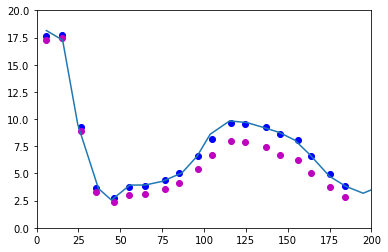

In [48]:
from scipy.interpolate import interp1d

tmp1_ = interp1d(r_HI_dens, HI_dens)

for r_, d_ in zip(r_mol_dens, mol_dens):
    plt.scatter(r_, 1.36*(d_ + tmp1_(r_)), color='b')
    plt.scatter(r_, 1.36*d_ + tmp1_(r_), color='m')
    
plt.plot(r_g_dens, gas_dens, '-')
plt.ylim(0, 20)
plt.xlim(0, 200);

Да, действительно домножается сумма и в принципе расхождение не такое большое.

Надо исправить за другое расстояние (26.8) и $X_{CO}=1.9$. Сейчас исправим только за расстояние, т.к. фактор у нас пока такой же:

In [49]:
HI_dens = [l*(26.8/distance)**2 for l in HI_dens]
mol_dens = [l*(26.8/distance)**2 * (X_CO/1.9) for l in mol_dens]
gas_dens = [l*(26.8/distance)**2 for l in gas_dens]

In [50]:
import scipy.interpolate

y_interp = scipy.interpolate.interp1d(list(r_mol_dens), list(mol_dens))

def y_interp_(r):
    if r <= min(r_mol_dens):
        return y_interp(min(r_mol_dens))
    elif r < max(r_mol_dens):
        return y_interp(r)
    else:
        return 0.

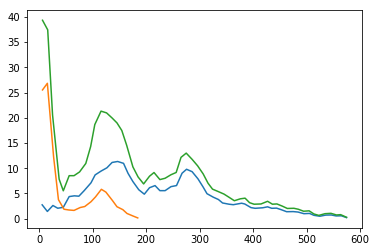

In [51]:
plt.plot(r_HI_dens, HI_dens)
plt.plot(r_mol_dens, mol_dens)
plt.plot(r_g_dens, gas_dens);

И проинтегрировать массы:

In [52]:
import scipy.integrate as integrate
import scipy.interpolate

tmp_ = scipy.interpolate.interp1d(r_HI_dens, HI_dens)

result = integrate.quad(lambda l: 2*np.pi*l*tmp_(l), r_HI_dens[0], r_HI_dens[-1])
print (scale * 1000.)**2 * result[0]/1e9

27.4434876449


C:\Anaconda\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [53]:
tmp_ = scipy.interpolate.interp1d(r_mol_dens, mol_dens)

result = integrate.quad(lambda l: 2*np.pi*l*tmp_(l), r_mol_dens[0], r_mol_dens[-1])
print (scale * 1000.)**2 * result[0]/1e9

2.5017812108


## Данные по фотометрии

* декомпозиция в $J$, $H$, $K$ из http://www.aanda.org/articles/aa/pdf/2001/10/aa10227.pdf (без профилей)
* древняя в $r$ http://adsabs.harvard.edu/cgi-bin/bib_query?1985ApJS...59..115K
* S4G http://adsabs.harvard.edu/abs/2015ApJS..219....4S (в онлайн данных)
* еще $3.6$ есть тут http://iopscience.iop.org/article/10.1088/0004-637X/716/2/942/pdf

In [54]:
all_photometry = []

**S4G** данные из GALFIT (есть бар в модели!):

In [55]:
r_eff_s4g = 10.14
# mu_eff_s4g = ...
n_s4g = 2.212
mu0d_s4g = 20.337
h_disc_s4g = 73.20

Тут нужно учитывать, что эти параметры в AB-mag и нуждаются в доп. исправлении.

In [56]:
M_to_L_s4g = s4g_mass_to_light(-21.762, -21.267)
M_to_L_s4g

0.67889873586113669

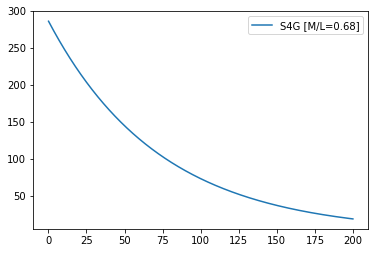

In [57]:
p_ = np.arange(0.1, 200., 0.1)

surf_s4g = [s4g_surf_density(mu_disc(l, mu0=mu0d_s4g, h=h_disc_s4g), M_to_L_s4g) for l in p_]
plt.plot(p_, surf_s4g, '-', label='S4G [M/L={:2.2f}]'.format(M_to_L_s4g))
plt.legend();

Достаточно маленькие.

In [58]:
all_photometry.append(('S4G 3.6', r_eff_s4g, None, n_s4g, mu0d_s4g, h_disc_s4g, M_to_L_s4g, 
                       lambda l: s4g_surf_density(mu_disc(l, mu0=mu0d_s4g, h=h_disc_s4g), M_to_L_s4g)))

In [59]:
mu0d_J = 17.78
h_disc_J = 49.99
mu0d_H = 17.11
h_disc_H = 50.28
mu0d_K = 17.01
h_disc_K = 54.66

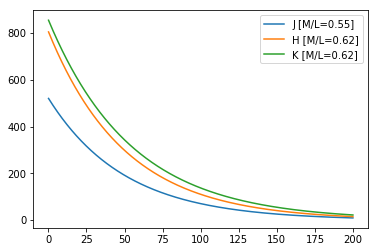

In [60]:
b_v_color = 0.012 #TODO: не знаем на самом деле какой цвет (вот тут https://arxiv.org/pdf/1102.1724v1.pdf указано 0.012)
# тут https://arxiv.org/pdf/astro-ph/0610688v2.pdf есть B и V в Янских

M_to_L_J = bell_mass_to_light(b_v_color, 'J', 'B-V')
surf_J = [surf_density(mu=mu_disc(l, mu0=mu0d_J, h=h_disc_J), M_to_L=M_to_L_J, band='J') for l in p_]
plt.plot(p_, surf_J, '-', label='J [M/L={:2.2f}]'.format(M_to_L_J))

M_to_L_H = bell_mass_to_light(b_v_color, 'H', 'B-V')
surf_H = [surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=M_to_L_H, band='H') for l in p_]
plt.plot(p_, surf_H, '-', label='H [M/L={:2.2f}]'.format(M_to_L_H))

M_to_L_K = bell_mass_to_light(b_v_color, 'K', 'B-V')
surf_K = [surf_density(mu=mu_disc(l, mu0=mu0d_K, h=h_disc_K), M_to_L=M_to_L_K, band='K') for l in p_]
plt.plot(p_, surf_K, '-', label='K [M/L={:2.2f}]'.format(M_to_L_K))

plt.legend()

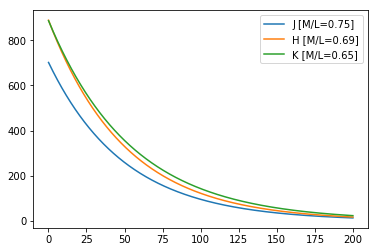

In [61]:
p_ = np.arange(0.1, 200., 0.1)

b_r_color = 0.55 #вот отсюда древнее B-R https://ui.adsabs.harvard.edu/#abs/1995AJ....109..543B/abstract

M_to_L_J = bell_mass_to_light(b_r_color, 'J', 'B-R')
surf_J = [surf_density(mu=mu_disc(l, mu0=mu0d_J, h=h_disc_J), M_to_L=M_to_L_J, band='J') for l in p_]
plt.plot(p_, surf_J, '-', label='J [M/L={:2.2f}]'.format(M_to_L_J))

M_to_L_H = bell_mass_to_light(b_r_color, 'H', 'B-R')
surf_H = [surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=M_to_L_H, band='H') for l in p_]
plt.plot(p_, surf_H, '-', label='H [M/L={:2.2f}]'.format(M_to_L_H))

M_to_L_K = bell_mass_to_light(b_r_color, 'K', 'B-R')
surf_K = [surf_density(mu=mu_disc(l, mu0=mu0d_K, h=h_disc_K), M_to_L=M_to_L_K, band='K') for l in p_]
plt.plot(p_, surf_K, '-', label='K [M/L={:2.2f}]'.format(M_to_L_K))

plt.legend()

Разница, как мы видим, не столь существенная.

TODO: разобраться с цветом

In [62]:
all_photometry.append(('Heidt J', None, None, None, mu0d_J, h_disc_J, M_to_L_J, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_J, h=h_disc_J), M_to_L=M_to_L_J, band='J')))

all_photometry.append(('Heidt H', None, None, None, mu0d_H, h_disc_H, M_to_L_H, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=M_to_L_H, band='H')))

all_photometry.append(('Heidt K', None, None, None, mu0d_K, h_disc_K, M_to_L_K, 
                       lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_K, h=h_disc_K), M_to_L=M_to_L_K, band='K')))

$3.6\mu m$ из http://iopscience.iop.org/article/10.1088/0004-637X/716/2/942/pdf

In [63]:
# for 3.6 band
dist_36 =  13.24 #Mpc
r_eff_36 = np.power(10., 3.)/scale/1000./(dist_36/20.4) #pc
mu_eff_36 = 17.49
n_36 = 3.61
mu0d_36 = 19.65
h_disc_36 = np.power(10., 3.66)/scale/1000./(dist_36/20.4) #because original is Log(), pc

Опять же, надо исправлять.

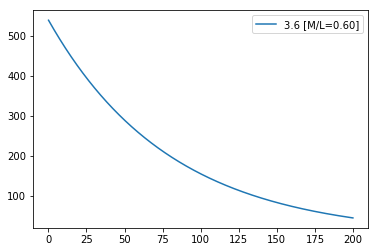

In [64]:
surf_36 = [s4g_surf_density(mu=m, M_to_L=M_to_L_s4g) for m in [mu_disc(l, mu0=mu0d_36, h=h_disc_36) for l in p_]]

plt.plot(p_, surf_36, '-', label='3.6 [M/L={:2.2f}]'.format(0.6))
plt.legend()

Вполне неплохо. Можем сравнить еще с калибровками McGaugh:

In [65]:
bv_color = 0.9
mcgaugh_mass_to_light(bv_color, 'mu36')

array([ 0.47,  0.67,  1.03,  0.8 ])

Ну да, тут все похоже честно. Смущает конечно разница в центральной яркости с S4G, причем я не смог ничего найти насчет депроецировано или нет. Если депроецировать - становятся похожи:

In [66]:
mu_face_on(mu0d_36, cos_i)

20.129831258118912

Добавим и депроецированные и нет:

In [67]:
all_photometry.append(('infra 3.6', r_eff_36, mu_eff_36, n_36, mu0d_36, h_disc_36, M_to_L_s4g, 
                       lambda l: s4g_surf_density(mu=mu_disc(l, mu0=mu0d_36, h=h_disc_36), M_to_L=M_to_L_s4g)))

all_photometry.append(('infra 3.6 face-on', r_eff_36, mu_eff_36, n_36, mu_face_on(mu0d_36, cos_i), h_disc_36, M_to_L_s4g, 
                       lambda l: s4g_surf_density(mu=mu_disc(l, mu0=mu_face_on(mu0d_36, cos_i), h=h_disc_36), M_to_L=M_to_L_s4g)))

Суммарная картинка:

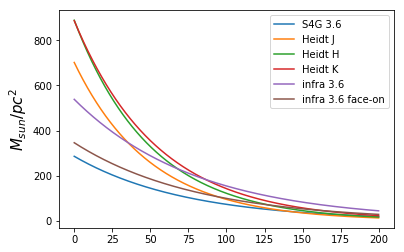

In [68]:
for photom in all_photometry:
    plt.plot(p_, map(photom[-1], p_), '-', label=photom[0])
plt.ylabel('$M_{sun}/{pc}^2$', fontsize=15.)
plt.legend(loc='best')
plt.legend()

Неплохо.

In [69]:
show_all_photometry_table(all_photometry, scale)

+------+-------------------+---------+----------+--------+---------+----------+-------+-------------+-----------+
|      | Name              |   r_eff |   mu_eff |      n |   mu0_d |   h_disc |   M/L | M_d/M_sun   |   Sigma_0 |
|------+-------------------+---------+----------+--------+---------+----------+-------+-------------+-----------|
| 0.00 | S4G 3.6           |   10.14 |   nan    |   2.21 |   20.34 |    73.20 |  0.68 | 7.47E+10.   |       286 |
| 1.00 | Heidt J           |  nan    |   nan    | nan    |   17.78 |    49.99 |  0.75 | 8.55E+10.   |       703 |
| 2.00 | Heidt H           |  nan    |   nan    | nan    |   17.11 |    50.28 |  0.69 | 1.10E+11.   |       891 |
| 3.00 | Heidt K           |  nan    |   nan    | nan    |   17.01 |    54.66 |  0.65 | 1.29E+11.   |       889 |
| 4.00 | infra 3.6         |   17.51 |    17.49 |   3.61 |   19.65 |    80.03 |  0.68 | 1.68E+11.   |       539 |
| 5.00 | infra 3.6 face-on |   17.51 |    17.49 |   3.61 |   20.13 |    80.03 |  0.68 | 

### Сравнение с Кривой вращения тонкого диска

Можно провести тест-сравнение с кривой вращения тонкого диска при заданной фотометрии, если она слишком массивная - то не брать ее (это ограничение сверху).  

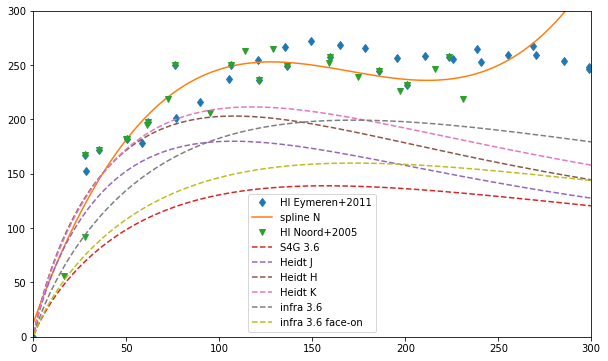

In [70]:
fig = plt.figure(figsize=[10,6])

plt.plot(_1, _2, 'd', label='HI Eymeren+2011')
plt.plot(test_points, spl_gas_N(test_points), '-', label='spline N')

plt.plot(r_n[:-20], vel_n[:-20], 'v', label='HI Noord+2005')

for photom in all_photometry:
    plt.plot(test_points, map(lambda l: disc_vel(l, photom[7](0), photom[5], scale), test_points), '--', label=photom[0])


plt.ylim(0, 300)
plt.xlim(0, 300)
plt.legend(loc='best');

Все достаточно хорошо.

## Зоны звездообразования


$H_{\alpha}$ , $UV$

есть $H_{\alpha}$ в Hameed 2005 http://iopscience.iop.org/article/10.1086/430211/pdf

**ВАЖНО:** в этой работе расстояние вообще 12.4 Мпк, соответственно неправильно пересчитываются масштабы

TODO: разобраться с расстояниями-масштабами, проверить в других галактиках

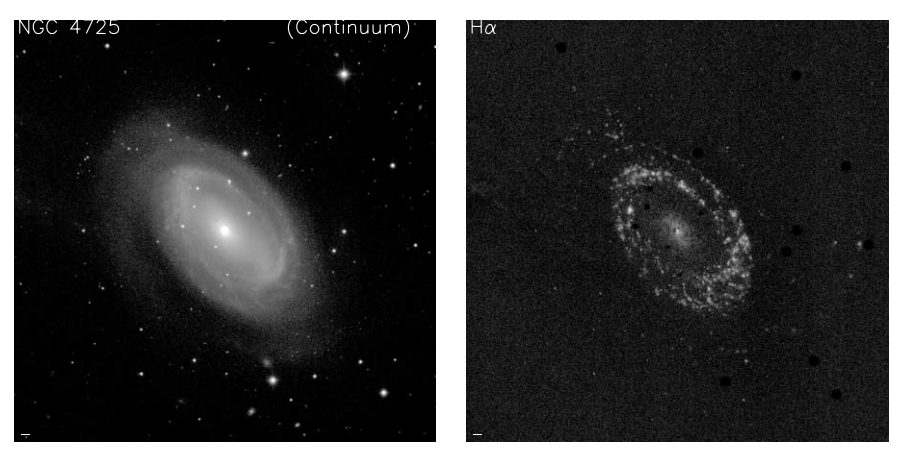

In [71]:
Image('n4725_halpha.png')

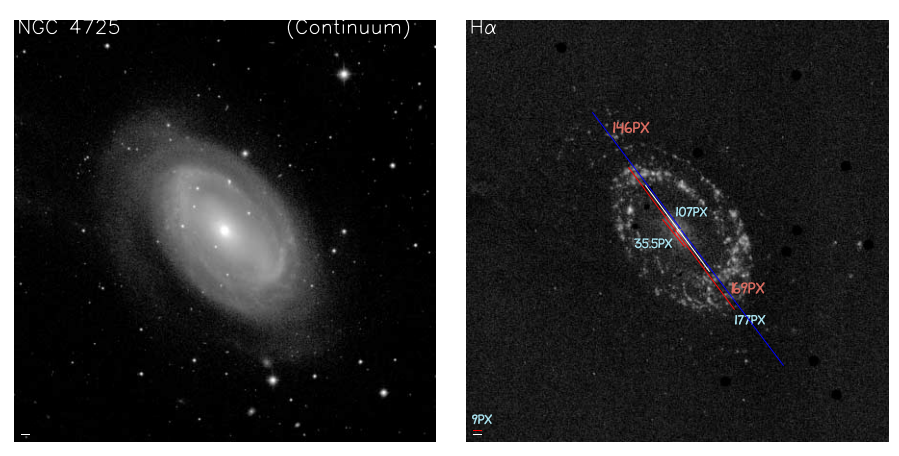

In [72]:
Image('n4725_halpha_dist.png')

Совмещенная картинка $H_{\alpha}$ + SDSS: (на самом деле совместил не очень качествено - видно например по трем звездам в центре)

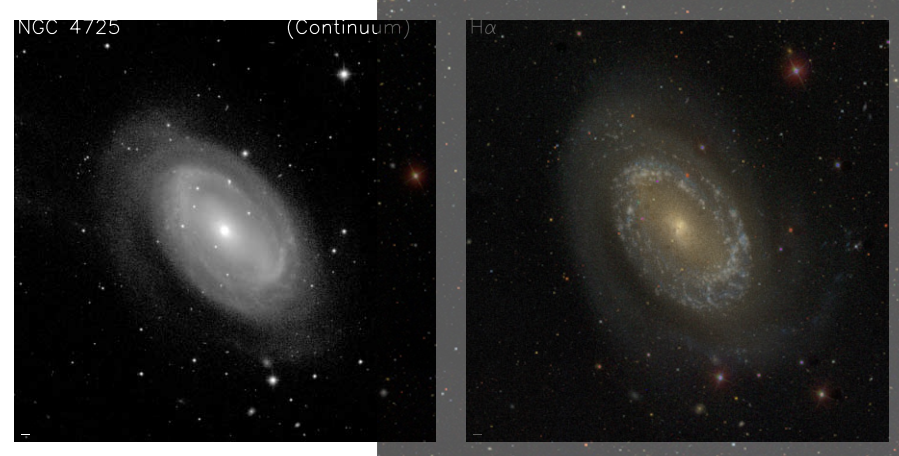

In [73]:
Image('n4725_halpha_plus_sdss.png')

В обратную сторону совмещенная:

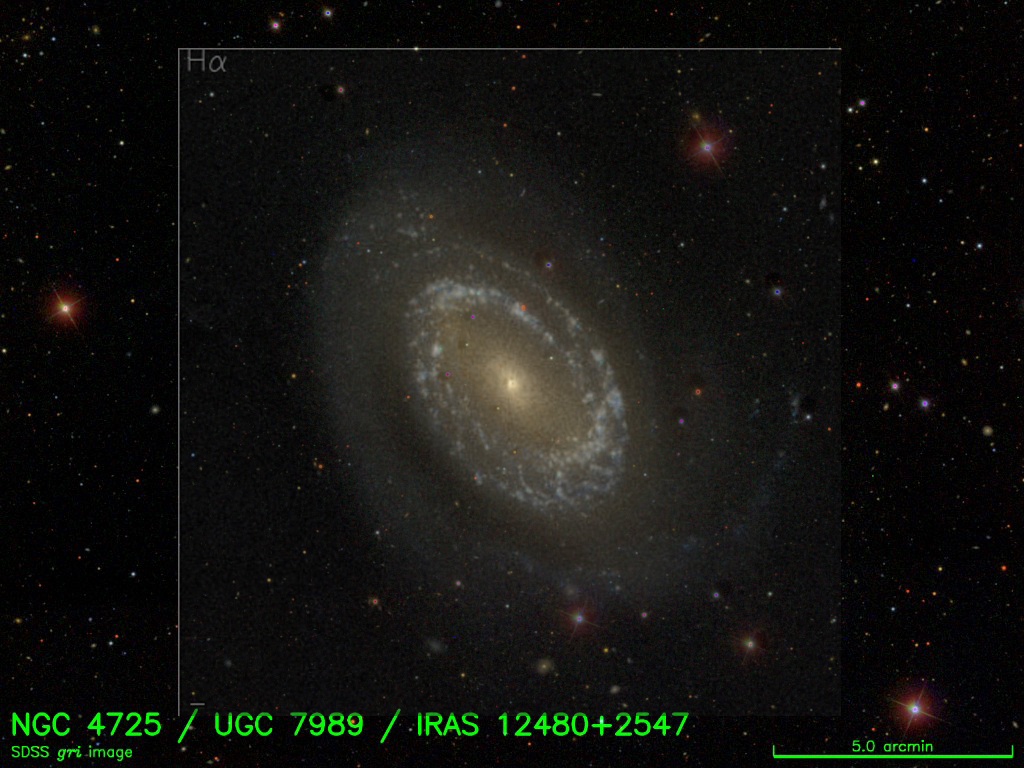

In [74]:
Image('n4725_SDSS_labeled_plus_halpha.jpg')

In [75]:
#SDSS
print 251*300/238. #arcsec
print 251*300/238.*0.130 #kpc, for distance 26.8 Mpc
#Hameed
print 161./9. #kpc
#distance ratio
print 26.8/12.4
print 41./17.9

316.386554622
41.1302521008
17.8888888889
2.16129032258
2.2905027933


Т.е. можно считать, что для исправления надо примерно *2.2 (чтобы привести к такому же масштабу, как SDSS), но тогда не очень точно получается спираль внешняя. Проще всего еще раз перемерить для SDSS картинки: (также здесь отмечены звезды, для которых я мерял выше расстояния)

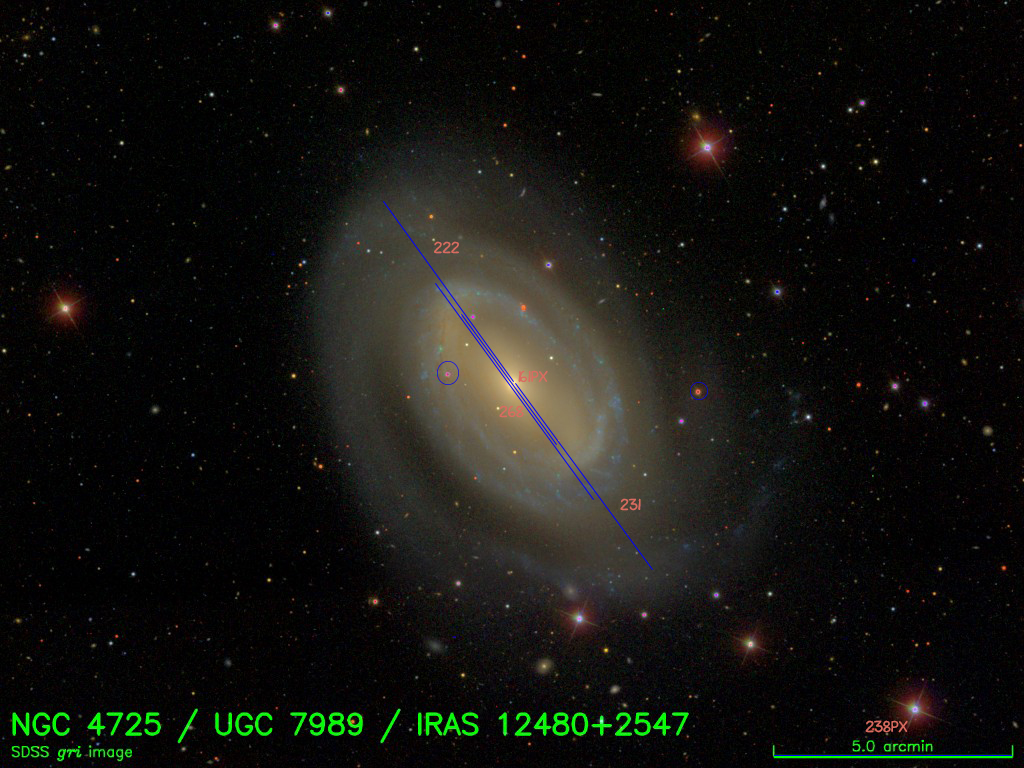

In [76]:
Image('n4725_SDSS_labeled_sizes.jpg', width=600)

(0, 200)

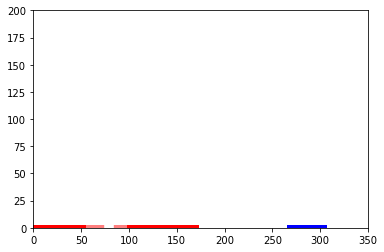

In [77]:
def plot_SF(ax):
#     как было
#     ax.plot([0., 35.5/2./9./scale], [0., 0.], '-', lw=7., color='red')
#     ax.plot([107./2./9./scale, 177./2./9./scale], [0., 0.], '-', lw=7., color='red')
#     ax.plot([146./9./scale, 169./9./scale], [0., 0.], '-', lw=7., color='b') #внешняя спираль

    ax.plot([0., 300./238 * 161./4.], [0., 0.], '-', lw=7., color='red') #очень примерно, потому что в SDSS не видно, но оно там есть
    ax.plot([300./238 * 161./4., 300./238 *268./2.], [0., 0.], '--', lw=6., color='red', alpha=0.5) #в спитцере видно слабое
    ax.plot([300./238 * 161./2., 300./238 *268./2.], [0., 0.], '-', lw=7., color='red')
    ax.plot([290./238 *220., 300./238 *240], [0., 0.], '-', lw=7., color='b') #внешняя спираль, ширина условна
    
plot_SF(plt.gca())
plt.xlim(0, 350)
plt.ylim(0, 200)

Видно, что теперь внешняя спираль находится на втором горбе данных, как и должно быть.

Есть еще ИК изображение от SPITZER http://www.spitzer.caltech.edu/images/2355-sig05-011-NGC-4725

> Red represents warm dust clouds illuminated by newborn stars, while blue indicates older, cooler stellar populations. 

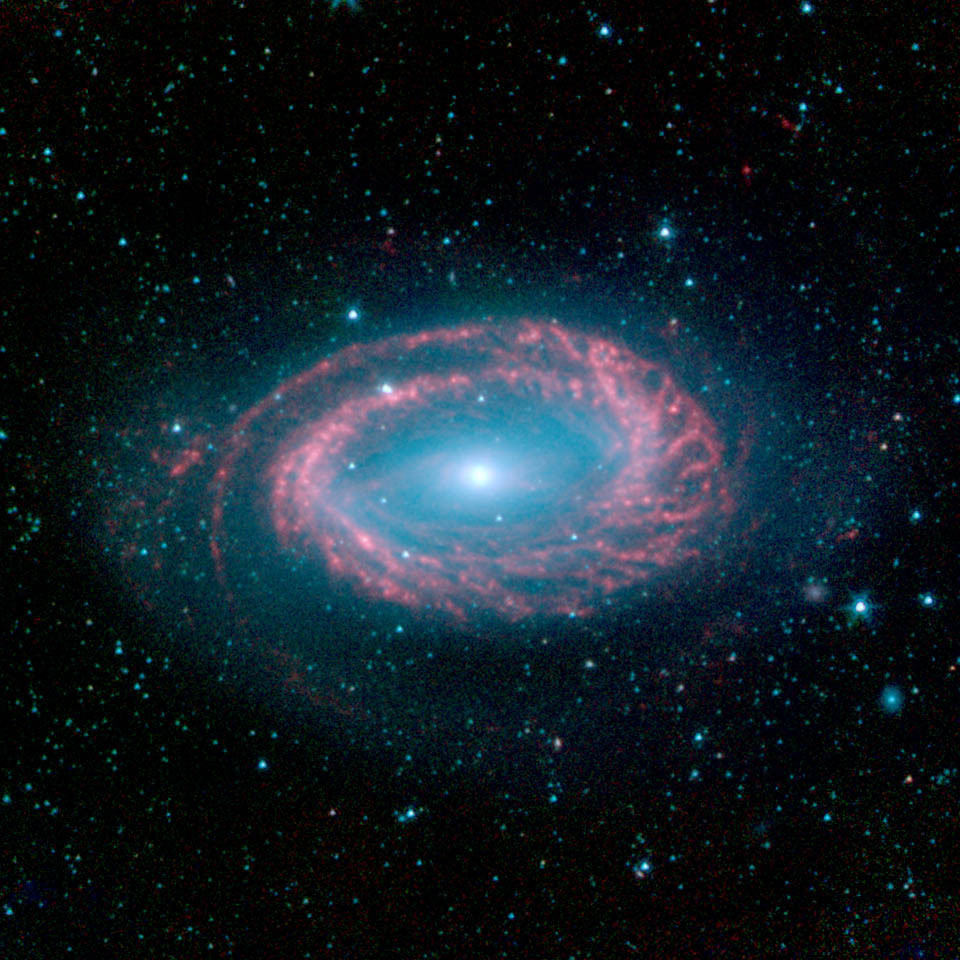

In [78]:
Image('n4725_SPITZER.jpg', width=500)

## Неустойчивость

### Одножидкостная

Устойчиво, когда > 1:
$$Q_g = \frac{\Sigma_g^{cr}}{\Sigma_g}=\frac{\kappa c_g}{\pi G \Sigma_g}$$
$$Q_s = \frac{\Sigma_s^{cr}}{\Sigma_s}=\frac{\sigma_R}{\sigma_R^{min}}=\frac{\kappa \sigma_R}{3.36 G \Sigma_s}$$

In [79]:
sound_vel = 6  #скорость звука в газе, км/с
data_lim = max(r_sig_ma) #где заканчиваются данные

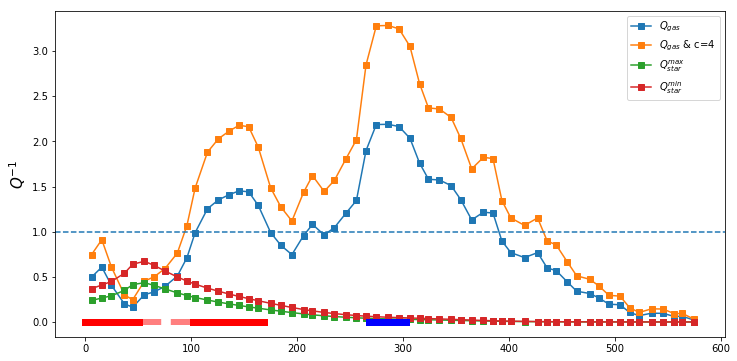

In [80]:
fig = plt.figure(figsize=[12, 6])

plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$')
plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=4., gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], gas_dens)], 's-', label='$Q_{gas}$ & c=4')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens],
                        map(sig_R_maj_max, r_g_dens), 
                        [surf_density(l_, M_to_L_K, 'K') for l_ in [mu_disc(ll, mu0=mu0d_K, h=h_disc_K) for ll in r_g_dens]])], 's-', label='$Q_{star}^{max}$')

plt.plot(r_g_dens, [1./Qs(epicycl=l[0], sigma=l[1], star_density=l[2]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens],
                        map(sig_R_maj_min, r_g_dens), 
                        [surf_density(l_, M_to_L_K, 'K') for l_ in [mu_disc(ll, mu0=mu0d_K, h=h_disc_K) for ll in r_g_dens]])], 's-', label='$Q_{star}^{min}$')

plt.axhline(y=1, ls='--')
plt.legend()
plot_SF(plt.gca())
plt.ylabel('$Q^{-1}$', fontsize=15);

Видно, что в центре с кучей газа неустойчивость, но эффект быстро спадает.

**НЕ ИСПРАВЛЕНО ЗА 1.6!** И не надо.

Для внешней спирали что-то видно, давайте сохраним картинку:

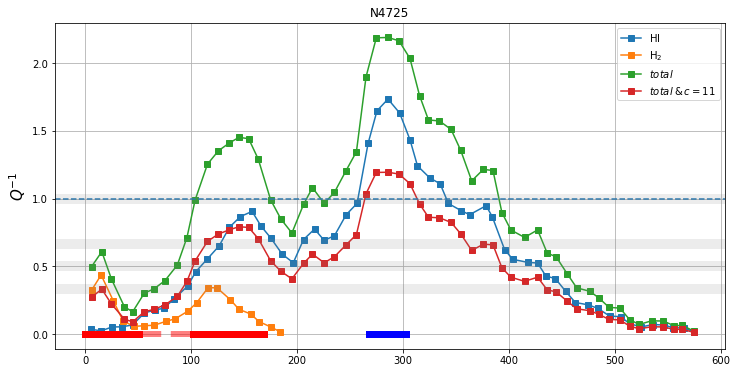

In [81]:
fig = plt.figure(figsize=[12, 6])

plt.plot(r_HI_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], HI_dens)], 's-', label=r'$\rm{HI}$')
plt.plot(r_mol_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], mol_dens)], 's-', label=r'$\rm{H_2}$')
plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], gas_dens)], 's-', label=r'$total$')
plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=11., gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], gas_dens)], 's-', label=r'$total\: &\: c=11$')

plt.axhline(y=1, ls='--')
plt.legend()
plot_SF(plt.gca())
plt.ylabel('$Q^{-1}$', fontsize=15)
plt.title(name)
for q_ in [1., 1.5, 2., 3.]:
    plt.axhline(y=1./q_, lw=10, alpha=0.15, color='grey')
plt.grid()
plt.savefig('..\\..\pics\\instab_spirals\\'+name+'_spiral'+'.png', format='png', bbox_inches='tight');

### Двухжидкостная

Кинетическое приближение:
$$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{1}{\bar{k}}\left[1-e^{-\bar{k}^{2}}I_{0}(\bar{k}^{2})\right]+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1\,$$

Гидродинамическое приближение:
$$\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{s}}}{\kappa+k^{2}\sigma_{\mathrm{s}}}+\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{g}}}{\kappa+k^{2}c_{\mathrm{g}}}>1$$ или $$\frac{1}{Q_{\mathrm{eff}}}=\frac{2}{Q_{\mathrm{s}}}\frac{\bar{k}}{1+\bar{k}^{2}}+\frac{2}{Q_{\mathrm{g}}}s\frac{\bar{k}}{1+\bar{k}^{2}s^{2}}>1$$ для безразмерного волнового числа ${\displaystyle \bar{k}\equiv\frac{k\,\sigma_{\mathrm{s}}}{\kappa}},\, s=c/\sigma$

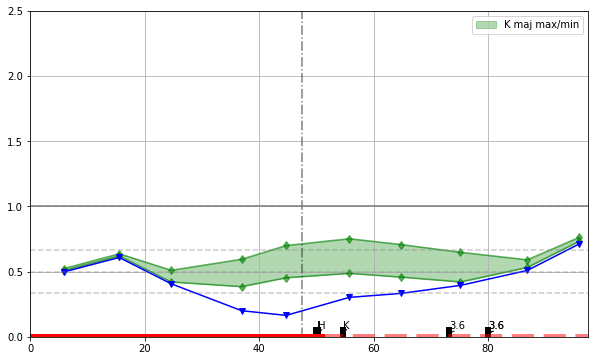

In [82]:
total_gas_data = zip(r_g_dens, map(lambda l: l, gas_dens))[:10]
disk_scales = [(l[5], l[0].split(' ')[1]) for l in all_photometry]

fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu_disc(l, mu0=mu0d_K, h=h_disc_K), M_to_L_K, 'K'), 
              star_density_min=lambda l: surf_density(mu_disc(l, mu0=mu0d_K, h=h_disc_K), M_to_L_K, 'K'), 
              data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='K maj max/min')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid();

# End

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


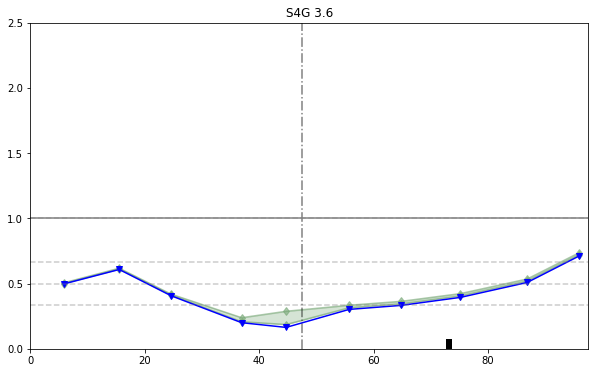

In [83]:
from matplotlib.animation import FuncAnimation

fig = plt.gcf()
plt.figure(figsize=(10,6))

ax = plt.gca()

def animate(i):
    ax.cla()
    plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=all_photometry[i][-1], 
              star_density_min=all_photometry[i][-1],
              data_lim=data_lim, color=np.random.rand(3), alpha=0.3, disk_scales=[(all_photometry[i][5], '')])
    ax.axhline(y=1., ls='-', color='grey')
    ax.set_title(all_photometry[i][0])
    ax.set_ylim(0., 2.5)
    return ax
anim = FuncAnimation(plt.gcf(), animate, frames=len(all_photometry), interval=1000)

In [84]:
# anim.save('..\\..\pics\\'+name+'.gif', writer='imagemagick', fps=1)

In [85]:
# from IPython.display import HTML
# HTML(anim.to_html5_video())

### Самый максимальный диск

Существует ограничение на максимальный диск в ~0.85 (изотермическое гало) и на субмаксимальный в 0.55-0.6 (NFW гало). Попробуем дотянуть фотметрию до максимальных дисков и посмотрим, как изменятся M/L (скорость зависит как корень из M/L):

S4G 3.6        : M/L was 0.68 and for max it equal 1.69, for submax equal 0.84
Heidt J        : M/L was 0.75 and for max it equal 1.00, for submax equal 0.50
Heidt H        : M/L was 0.69 and for max it equal 0.72, for submax equal 0.36
Heidt K        : M/L was 0.65 and for max it equal 0.65, for submax equal 0.33
infra 3.6      : M/L was 0.68 and for max it equal 0.82, for submax equal 0.41
infra 3.6 face-on: M/L was 0.68 and for max it equal 1.28, for submax equal 0.64


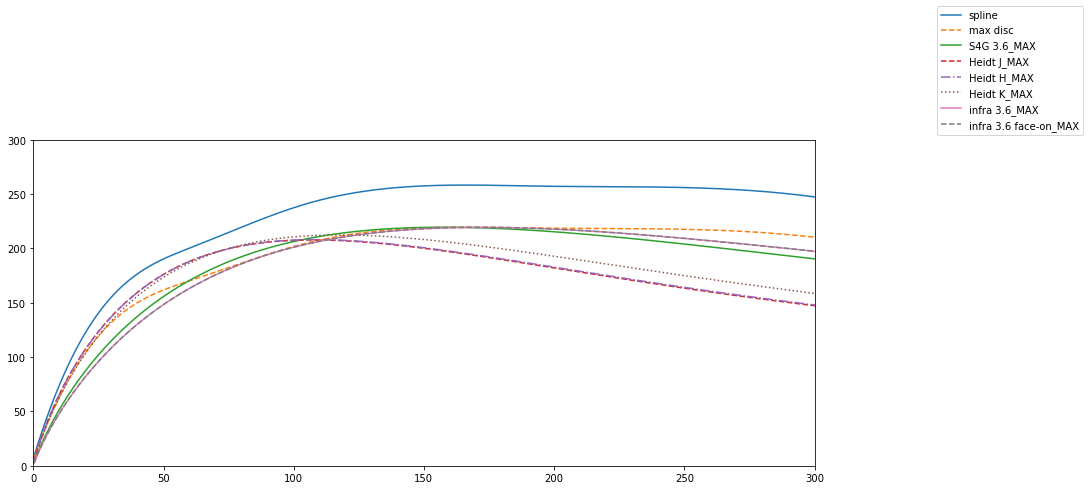

In [86]:
fig = plt.figure(figsize=[14,6])

plt.plot(test_points, spl_gas(test_points), '-', label='spline')
plt.plot(test_points, 0.85*spl_gas(test_points), '--', label='max disc')
# plt.plot(test_points, 0.6*spl_gas(test_points), '--', label='submax disc')
# plt.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=0, label = 'WSRT')
# plt.plot(r, vel, '.', label = 'Noord thesis')

max_coeffs = {}

for photom in all_photometry:
    disc_max = 2.2*photom[5]
    max_coeff = 0.85*spl_gas(disc_max)/disc_vel(disc_max, photom[7](0), photom[5], scale)
    submax_coeff = 0.6*spl_gas(disc_max)/disc_vel(disc_max, photom[7](0), photom[5], scale)
    
    plt.plot(test_points, map(lambda l: disc_vel(l, max_coeff**2 * photom[7](0), photom[5], scale), test_points), next(linecycler), label=photom[0] + '_MAX')
    
    print '{:15s}: M/L was {:2.2f} and for max it equal {:2.2f}, for submax equal {:2.2f}'.format(photom[0], photom[6], photom[6]*max_coeff**2, photom[6]*submax_coeff**2)
    max_coeffs[photom[0]] = [max_coeff**2, submax_coeff**2]


plt.ylim(0, 300)
plt.xlim(0, 300)
plt.legend(bbox_to_anchor=(1.15, 1.0));

Значения я бы даже сказал маленькие.

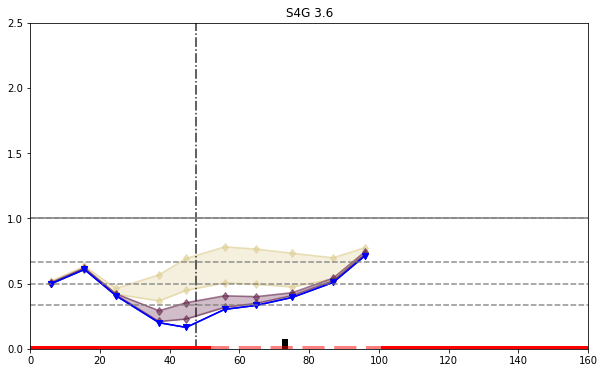

In [87]:
from matplotlib.animation import FuncAnimation

fig = plt.gcf()
plt.figure(figsize=(10,6))

ax = plt.gca()

def animate(i):
    ax.cla()
    
    plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: max_coeffs[all_photometry[i][0]][0]*all_photometry[i][-1](l), 
              star_density_min=lambda l: max_coeffs[all_photometry[i][0]][0]*all_photometry[i][-1](l),
              data_lim=data_lim, color=np.random.rand(3), alpha=0.3, disk_scales=[(all_photometry[i][5], '')])
    
    plot_2f_vs_1f(ax=ax, total_gas_data=total_gas_data, epicycl=epicyclicFreq_real, gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: max_coeffs[all_photometry[i][0]][1]*all_photometry[i][-1](l), 
              star_density_min=lambda l: max_coeffs[all_photometry[i][0]][1]*all_photometry[i][-1](l),
              data_lim=data_lim, color=np.random.rand(3), alpha=0.3, disk_scales=[(all_photometry[i][5], '')])
    
    ax.axhline(y=1., ls='-', color='grey')
    ax.set_title(all_photometry[i][0])
    ax.set_ylim(0., 2.5)
    ax.set_xlim(0., 160.)
    plot_SF(ax)
    plot_Q_levels(ax, [1., 1.5, 2., 3.])
    return ax
anim = FuncAnimation(plt.gcf(), animate, frames=len(all_photometry), interval=1000)

In [88]:
# anim.save('..\\..\pics\\'+name+'_MAXDISCS.gif', writer='imagemagick', fps=1)

In [89]:
# from IPython.display import HTML
# HTML(anim.to_html5_video())

Есть очень неплохие модели.

### Картинка 

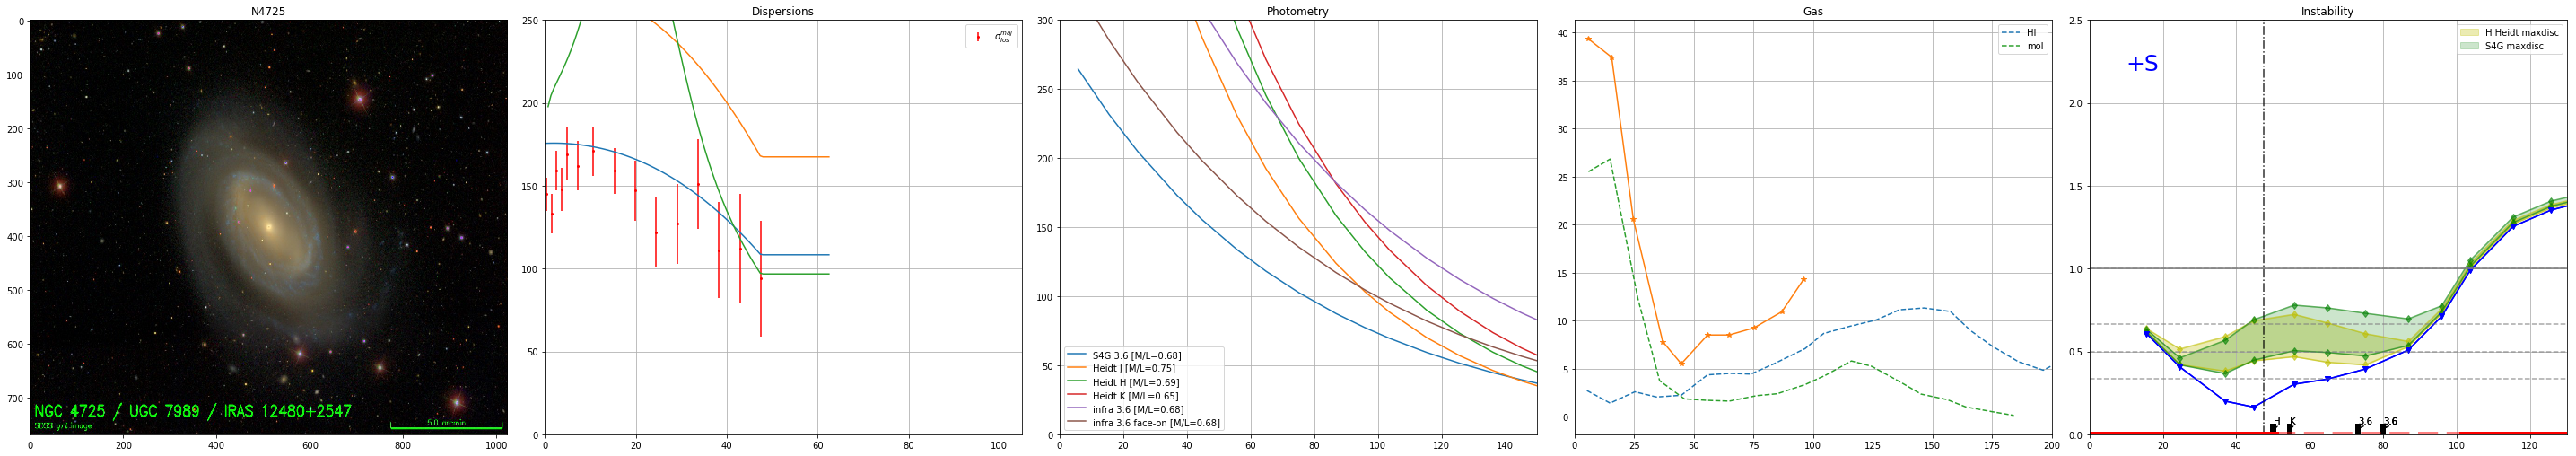

In [329]:
summary_imgs_path = '..\\..\pics\\notebook_summary\\'

def save_model_plot(path):
    fig, axes = plt.subplots(1, 5, figsize=[40,7])
    fig.tight_layout()
    
    axes[0].imshow(ImagePIL.open('n4725_SDSS_labeled.jpg'), aspect='auto')
    axes[0].set_title(name)
    
    try:
        axes[1].errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
        axes[1].plot(points, map(sig_R_maj_min, points))
        axes[1].plot(points, map(sig_R_maj_max, points))
        axes[1].plot(points, map(sig_R_maj_maxmaxtrue, points))
    except Exception:
        pass
    
    try:
        axes[1].errorbar(r_sig_mi, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{min}$')
        axes[1].plot(points, map(sig_R_minor_min, points), '--')
        axes[1].plot(points, map(sig_R_minor_max, points), '--')
    except Exception:
        pass

    axes[1].set_ylim(0,250)
    axes[1].set_xlim(0, 105)  
    axes[1].grid()
    axes[1].legend()
    axes[1].set_title('Dispersions')
    
    for photom in all_photometry:
        axes[2].plot(r_g_dens, map(photom[-1], r_g_dens), '-', label='{} [M/L={:2.2f}]'.format(photom[0], photom[-2]))
    axes[2].set_xlim(0, 150)
    axes[2].set_ylim(0, 300)
    axes[2].set_title('Photometry')
    axes[2].grid()
    axes[2].legend()
    
    axes[3].plot(r_HI_dens, HI_dens, '--', label='HI')
    axes[3].plot(zip(*total_gas_data)[0], zip(*total_gas_data)[1], '*-')
    axes[3].plot(r_mol_dens, mol_dens, '--', label='mol')
    axes[3].set_title('Gas')
    axes[3].grid()
    axes[3].set_xlim(0, 200)
    axes[3].legend()
       
    #change this
    @save_model(models_path+'n4725_modelHmax.npy')
    def plot_2f_vs_1f_(*args, **kwargs):
        plot_2f_vs_1f(*args, **kwargs)
    plot_2f_vs_1f_(ax=axes[4], total_gas_data=zip(r_g_dens, map(lambda l: l, gas_dens))[1:15], epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=0.72, band='H'), 
              star_density_min=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=0.72, band='H'), 
              data_lim=data_lim, color='y', alpha=0.3, disk_scales=disk_scales, label='H Heidt maxdisc',
              ML = 0.68,
              CO = lambda l: y_interp_(l))
    
    @save_model(models_path+'n4725_model36max.npy')
    def plot_2f_vs_1f_(*args, **kwargs):
        plot_2f_vs_1f(*args, **kwargs)
    plot_2f_vs_1f_(ax=axes[4], total_gas_data=zip(r_g_dens, map(lambda l: l, gas_dens))[1:15], epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: s4g_surf_density(mu_disc(l, mu0=mu0d_s4g, h=h_disc_s4g), 1.69), 
              star_density_min=lambda l: s4g_surf_density(mu_disc(l, mu0=mu0d_s4g, h=h_disc_s4g), 1.69), 
              data_lim=data_lim, color='g', alpha=0.2, disk_scales=disk_scales, label='S4G maxdisc',
              ML = 1.61,
              CO = lambda l: y_interp_(l))

    axes[4].set_ylim(0., 2.5)
    axes[4].set_xlim(0., 130.)
    axes[4].axhline(y=1., ls='-', color='grey')
    plot_SF(axes[4])
    axes[4].grid()
    axes[4].set_title('Instability')
    axes[4].text(10., 2.2, '+S', fontsize=25., color='b')
       
    plt.savefig(path+name+'.png', format='png', bbox_inches='tight');
    
save_model_plot(summary_imgs_path)

### Другие механизмы

Schaye (2004), 'cold gas phase':
$$\Sigma_g > 6.1 f_g^{0.3} Z^{-0.3} I^{0.23}$$
или при constant metallicity of 0.1 $Z_{sun}$ and interstellar flux of ionizing photons 10^6 cm−2 s−1:
$$\Sigma_g > 6.1 \frac{\Sigma_g}{\Sigma_g + \Sigma_s}$$

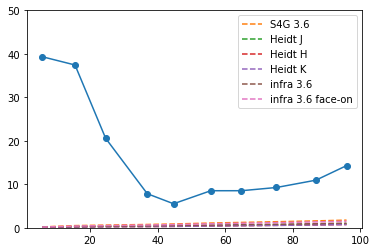

In [330]:
plt.plot(zip(*total_gas_data)[0], zip(*total_gas_data)[1], 'o-')

for photom in all_photometry:
    dens_s04 = [Sigma_crit_S04(l[0], l[1], photom[7]) for l in total_gas_data]
    plt.plot(zip(*total_gas_data)[0], dens_s04, '--', label=photom[0])

plt.legend()
plt.ylim(0, 50.);

Видимо неустойчиво вплоть до 40-45 (что кстати соглас. с звездообразованием).

Hunter et al (1998), 'competition with shear' according to Leroy: 
$$\Sigma_A = \alpha_A\frac{\sigma_g A}{\pi G}$$

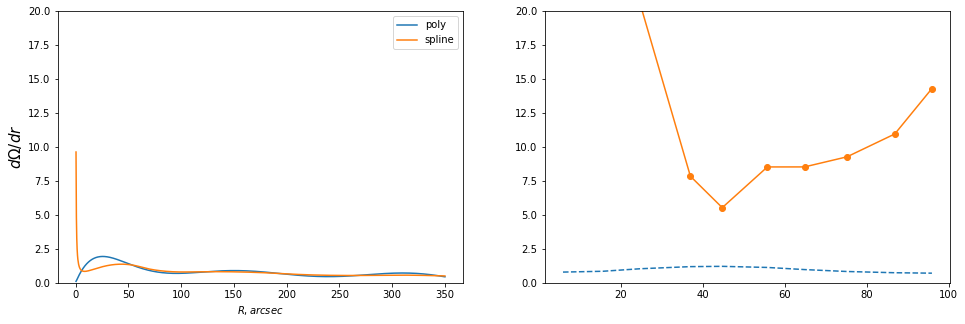

In [331]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=[16, 5])
ax1.plot(test_points, [oort_a(x, gas_approx) for x in test_points], '-', label='poly')
ax1.plot(test_points, [oort_a(x, spl_gas) for x in test_points], '-', label='spline')
ax1.set_xlabel('$R, arcsec$')
ax1.set_ylabel('$d\Omega/dr$', fontsize=15)
ax1.legend()
ax1.set_ylim(0, 20.)

dens_A = [Sigma_crit_A(l, spl_gas, 2., 6.) for l in zip(*total_gas_data)[0]]
ax2.plot(zip(*total_gas_data)[0], dens_A, '--')
ax2.plot(zip(*total_gas_data)[0], zip(*total_gas_data)[1], 'o-')
ax2.set_ylim(0, 20.);

Непонятно, судя по всему везде неустойчиво.

### Дисперсии из АD

Интересный вариант для тех галактик, в которых есть данные по газу. Разница между скоростями вращения звезд и газа вокруг центра галактики называется ассиметричным сдвигом и описывается следующим уравнением (Binney & Tremaine 1987): $$v_{\mathrm{c}}^{2}-\bar{v}_{\varphi}^{2}=\sigma_{R}^{2}\left(\frac{\sigma_{\varphi}^{2}}{\sigma_{R}^{2}}-1-\frac{\partial\ln\Sigma_{\mathrm{s}}}{\partial\ln R}-\frac{\partial\ln\sigma_{R}^{2}}{\partial\ln R}\right)\,$$
Отношение ${\displaystyle \frac{\sigma_{\varphi}^{2}}{\sigma_{R}^{2}}}$ знаем из соответствующего уравнения. Поймем, как в этом выражении вычисляется логарифмическая производная ${\displaystyle \frac{\partial\ln\Sigma_{\mathrm{s}}}{\partial\ln R}}$. Если отношение массы к светимости принять постоянной вдоль радиуса величиной, то в производной ${\displaystyle \frac{\partial\ln\Sigma_{\mathrm{s}}}{\partial\ln R}}$ можно использовать поверхностную яркость звездного диска вместо поверхностной плотности $\Sigma_{\mathrm{s}}$ в тех полосах, которые трассируют старое звездное население. Это означает, что логарифмическая производная должна быть заменена отношением $-{\displaystyle \frac{R}{h_{\text{d}}}}\,,$ где $h_{\text{d}}$ --- экспоненциальный масштаб диска.
Вычисление $\frac{\partial\ln\sigma_{R}^{2}}{\partial\ln R}$ из кинематического масштаба равно $-\frac{2R}{h_{kin}}$

In [332]:
def sigR2Evaluation(R, h, h_kin, p_star, p_gas):
    '''Вычисление sigmaR^2 в случае, если уже известен кинетический масштаб.'''
    return (p_gas(R) ** 2 - p_star(R) ** 2 ) / ( sigPhi_to_sigR_real(R) - 1 + R / h + R / h_kin )

def asymmetricDriftEvaluation(r_pc, h, path, p_star, p_gas, upperLimit):
    '''Вычисление ассиметричного сдвига на основе формулы (21) из методички. Логарифмическая производная от радиальной
     дисперсии скоростей считается как предложено в статье Silchenko et al. 2011, экспонентой фитируется для R > 1h.
     Сами значения считаются только для тех точек, есть данные и по газу и по звездам.'''
    eps = 0.1
    h_kin = 0
    h_kin_next = h
    sigR2 = []
    upper = upperLimit
    r_gt_1h = filter(lambda x: x > h and x <= upper, r_pc)
    expfit = poly1d(1)

    h_disc = h

    print '#!!!!!!!!!!!!# Asymmetric drift evaluation procedure with eps = ' + str(eps) + ' starts.'
    while(abs(h_kin - h_kin_next) > eps):
        h_kin = h_kin_next
        sigR2[:] = []
        for R in r_gt_1h:
            sigR2.append((p_gas(R) ** 2 - p_star(R) ** 2 ) / ( sigPhi_to_sigR_real(R) - 1 + R / h + R / h_kin ))
        sigR2 = map(math.log, sigR2)
        expfit = poly1d(polyfit(r_gt_1h, sigR2, deg=1))
        h_kin_next = (-1 / expfit.coeffs[0])
        print '#!!!!!!!!!!!!# Next approx h_kin =', h_kin_next

    h_kin = h_kin_next
    sigR2[:] = []
    for R in r_pc:
        sigR2.append((p_gas(R) ** 2 - p_star(R) ** 2 ) / ( sigPhi_to_sigR_real(R) - 1 + R / h + R / h_kin ))

    sigR20 = math.exp(expfit.coeffs[1])
#     rexp_sigR2 = evalStartExp(r_pc, sigR2, lambda x: sigR20 * math.exp(-x / h_kin))
    return sigR20, h_kin, [sigR2Evaluation(R, h, h_kin, p_star, p_gas) for R in r_pc]

sigR20, h_kin, sigR2 = asymmetricDriftEvaluation(r_sig_ma, 40., '', star_approx, spl_gas, sig_maj_lim)

#!!!!!!!!!!!!# Asymmetric drift evaluation procedure with eps = 0.1 starts.
#!!!!!!!!!!!!# Next approx h_kin = 22.2723039687
#!!!!!!!!!!!!# Next approx h_kin = 24.3219284405
#!!!!!!!!!!!!# Next approx h_kin = 23.9885882556
#!!!!!!!!!!!!# Next approx h_kin = 24.04036632


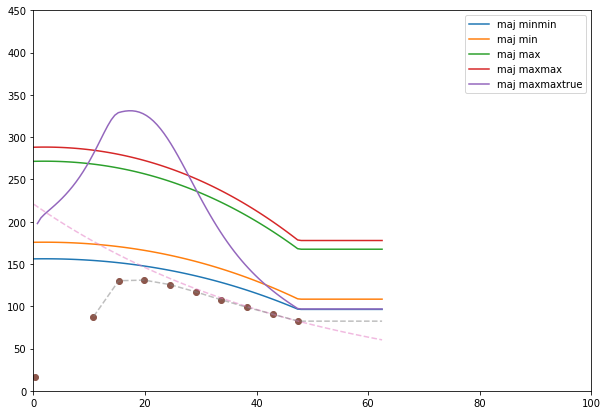

In [333]:
import scipy.interpolate
fig = plt.figure(figsize=[10, 7])

plt.plot(points, map(sig_R_maj_minmin, points), label = 'maj minmin')
plt.plot(points, map(sig_R_maj_min, points), label = 'maj min')
plt.plot(points, map(sig_R_maj_max, points), label = 'maj max')
plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maj maxmax')
plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maj maxmaxtrue')

plt.plot(r_sig_ma, np.sqrt(sigR2), 'o')
plt.plot(points, map(lambda l: np.sqrt(sigR20 * math.exp(-l / h_kin)), points),  '--', alpha=0.5)

ad_interp = scipy.interpolate.interp1d(r_sig_ma, np.sqrt(sigR2))

@flat_end(sig_maj_lim)
def ad_interp_(r):
    return ad_interp(r)

plt.plot(points[2:], map(ad_interp_, points[2:]),  '--', alpha=0.5)

plt.legend()
plt.ylim(0,450)
plt.xlim(0,100);

Довольно маленькие.

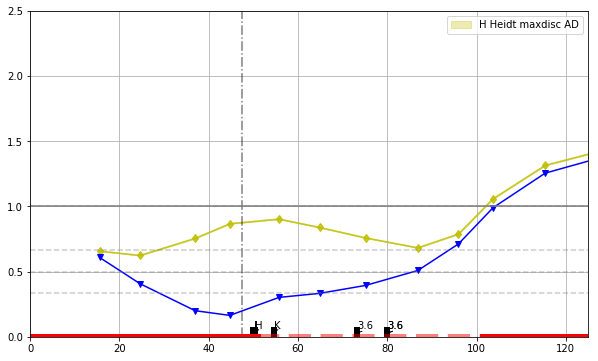

In [334]:
fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, map(lambda l: l, gas_dens))[1:15], epicycl=epicyclicFreq_real, 
          gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
          sigma_max=ad_interp_, 
          sigma_min=ad_interp_, 
          star_density_max=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=0.68, band='H'), 
          star_density_min=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=0.68, band='H'), 
          data_lim=data_lim, color='y', alpha=0.3, disk_scales=disk_scales, label='H Heidt maxdisc AD')

plt.ylim(0., 2.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid()
plt.xlim(0., 125);

Если брать экспонентой:

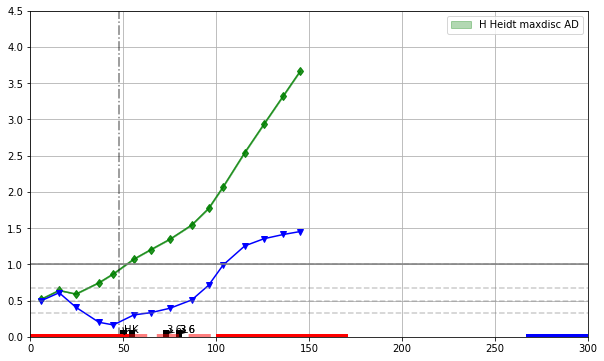

In [335]:
fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, map(lambda l: l, gas_dens))[:15], epicycl=epicyclicFreq_real, 
          gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
          sigma_max=lambda l: np.sqrt(sigR20 * math.exp(-l / h_kin)), 
          sigma_min=lambda l: np.sqrt(sigR20 * math.exp(-l / h_kin)), 
          star_density_max=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=0.68, band='H'), 
          star_density_min=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=0.68, band='H'), 
          data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='H Heidt maxdisc AD')


plt.xlim(0., 300.)
plt.ylim(0., 4.5)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid();

Да уж, сильно маленький масштаб получился.

### Экспоненциальные оценки H2

В работах van der Hulst (2016) и Bigiel, Blitz (2012) есть экспоненциальные соотношения для H2+HI (см. заметки). 

Можно попробовать использовать это для оценки молекулярной компоненты газа:

In [336]:
# r25 = h_disc_B*(25. - mu0d_B)/1.0857
# r25, h_disc_B, (25. - mu0d_B)/1.0857

r25 = 2.8*40.
r25

112.0

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:14: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


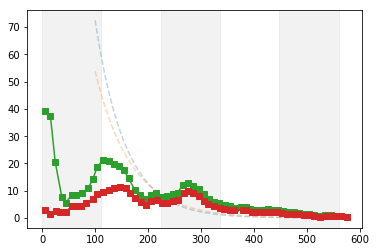

In [337]:
from scipy.optimize import curve_fit

def func1(x, a):
    return a * np.exp(-1.95 * x/r25)

def func2(x, a):
    return a * np.exp(-1.65 * x/r25)

popt, pcov = curve_fit(func1, r_HI_dens[20:], HI_dens[20:])
points_ = np.linspace(100., max(r_g_dens), 100.)
plt.plot(points_, func1(points_, *popt), '--', alpha=0.3)

popt, pcov = curve_fit(func2, r_HI_dens[20:], HI_dens[20:])
points_ = np.linspace(100., max(r_g_dens), 100.)
plt.plot(points_, func2(points_, *popt), '--', alpha=0.3)

for i in range(int(max(r_g_dens)/r25)+1):
    if i%2 == 0:
        plt.axvspan(i*r25, (i+1)*r25, color='grey', alpha=0.1)

plt.plot(r_g_dens, gas_dens, 's-')
plt.plot(r_HI_dens, HI_dens, 's-');

0.392231246881


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


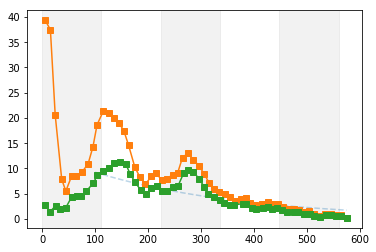

In [338]:
def func(x, a, b):
    return a * np.exp(-b * x/r25)

popt, pcov = curve_fit(func, r_HI_dens[7:], HI_dens[7:])
print popt[1]
points_ = np.linspace(100., max(r_g_dens), 100.)
plt.plot(points_, func(points_, *popt), '--', alpha=0.3)

for i in range(int(max(r_g_dens)/r25)+1):
    if i%2 == 0:
        plt.axvspan(i*r25, (i+1)*r25, color='grey', alpha=0.1)

plt.plot(r_g_dens, gas_dens, 's-')
plt.plot(r_HI_dens, HI_dens, 's-');

0.392231246881


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


0.510148122154
0.573131379486
0.533688759002
0.582651677151
0.735135536021
1.05723342957
1.24706928933
0.882207109332
0.816776267408
0.994917621512
1.0647601562
1.3497224875
1.30268788249
1.24434428737
0.912066185758


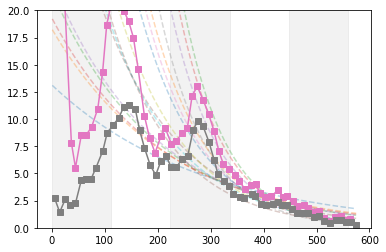

In [339]:
def func(x, a, b):
    return a * np.exp(-b * x/r25)

for i in range(7, len(r_HI_dens)-5, 3):
    popt, pcov = curve_fit(func, r_HI_dens[i:], HI_dens[i:])
    print popt[1]
    points_ = np.linspace(1., max(r_g_dens), 100.)
    plt.plot(points_, func(points_, *popt), '--', alpha=0.3)

for i in range(int(max(r_g_dens)/r25)+1):
    if i%2 == 0:
        plt.axvspan(i*r25, (i+1)*r25, color='grey', alpha=0.1)

plt.plot(r_g_dens, gas_dens, 's-')
plt.plot(r_HI_dens, HI_dens, 's-')
plt.ylim(0., 20.);

### Сравнение с Romeo Falstad 2013

In [340]:
import scipy.interpolate

y_interp = scipy.interpolate.interp1d(list(r_mol_dens), list(mol_dens))

def y_interp_(r):
    if r <= min(r_mol_dens):
        return y_interp(min(r_mol_dens))
    elif r < max(r_mol_dens):
        return y_interp(r)
    else:
        return 0.

Тут учитывается толщина диска:

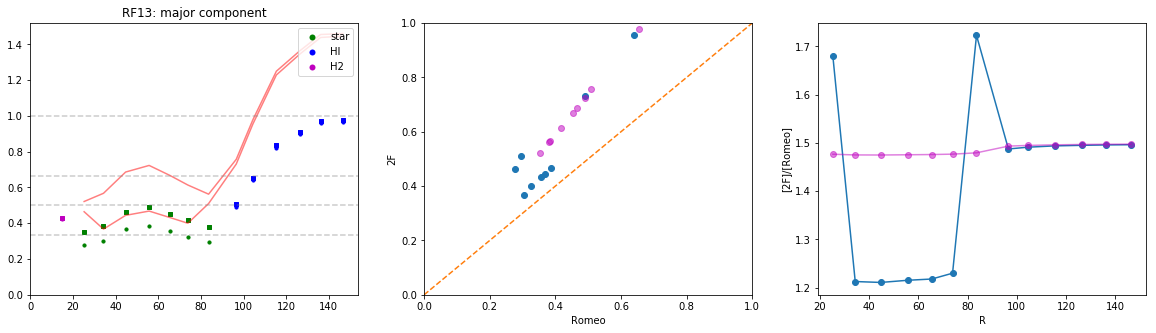

In [341]:
plot_RF13_vs_2F(r_g_dens=r_HI_dens[1:15], HI_gas_dens=HI_dens[1:15], CO_gas_dens=[y_interp_(l) for l in r_HI_dens][1:15], 
                epicycl=epicyclicFreq_real, sound_vel=sound_vel, sigma_R_max=sig_R_maj_max, sigma_R_min=sig_R_maj_min,  
                star_density=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=0.72, band='H'), 
                alpha_max=0.7, alpha_min=0.3, scale=scale, gas_approx=spl_gas, thin=False)

А тут нет:

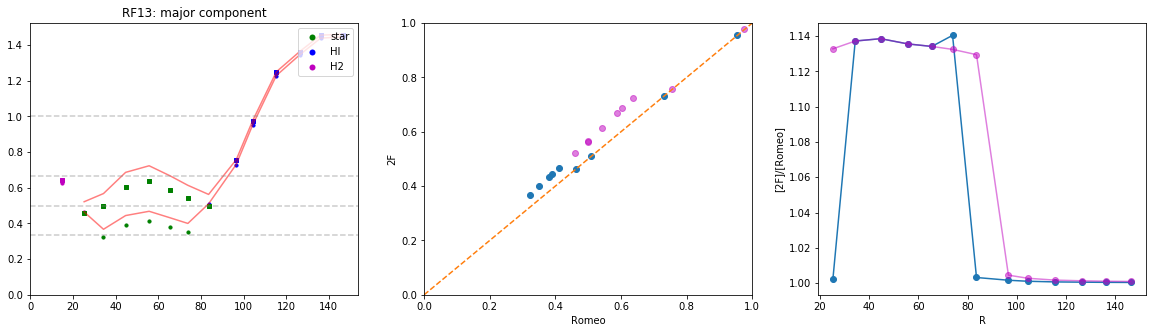

In [342]:
plot_RF13_vs_2F(r_g_dens=r_HI_dens[1:15], HI_gas_dens=HI_dens[1:15], CO_gas_dens=[y_interp_(l) for l in r_HI_dens][1:18], 
                epicycl=epicyclicFreq_real, sound_vel=sound_vel, sigma_R_max=sig_R_maj_max, sigma_R_min=sig_R_maj_min,  
                star_density=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=0.72, band='H'), 
                alpha_max=0.7, alpha_min=0.3, scale=scale, gas_approx=spl_gas, thin=True)
plt.savefig('..\\..\pics\\RF13\\'+name+'.png', format='png', bbox_inches='tight');

Видно, что согласие достаточно хорошее.

### Влияние параметров на результат

Влияние скорости звука:

Wall time: 7min 40s


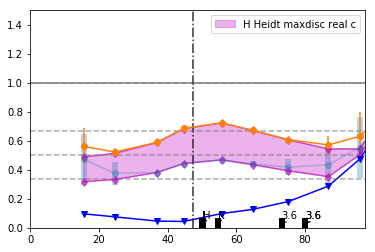

In [357]:
%%time
plot_param_depend(ax=plt.gca(), data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='H maxdisc', N = 20,
                  total_gas_data=zip(r_g_dens, map(lambda l: l, gas_dens))[1:15], 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=list(np.linspace(4., 15., 20)), 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=0.72, band='H'), 
                  star_density_min=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=0.72, band='H'))

r25_ = h_disc_H*(25. - mu0d_H)/1.0857
plot_2f_vs_1f(ax=plt.gca(), total_gas_data=zip(r_g_dens, map(lambda l: l, gas_dens))[1:15], epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, 
               sound_vel=[50*np.exp(-2*l/r25) if l < r25_ else 50*np.exp(-2.) for l in r_g_dens[1:15]],
               scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=0.72, band='H'), 
              star_density_min=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=0.72, band='H'), 
              data_lim=data_lim, color='m', alpha=0.3, disk_scales=disk_scales, label='H Heidt maxdisc real c')



plt.savefig('..\\..\pics\\cg\\'+name+'.png', format='png', bbox_inches='tight');

Влияние убирания молек. газа:

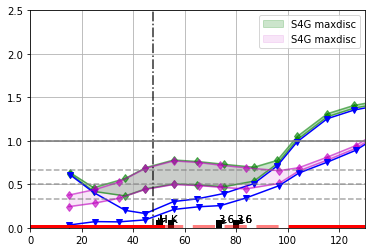

In [344]:
ax = plt.gca()
plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, map(lambda l: l, gas_dens))[1:15], epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: s4g_surf_density(mu_disc(l, mu0=mu0d_s4g, h=h_disc_s4g), 1.69), 
              star_density_min=lambda l: s4g_surf_density(mu_disc(l, mu0=mu0d_s4g, h=h_disc_s4g), 1.69), 
              data_lim=data_lim, color='g', alpha=0.2, disk_scales=disk_scales, label='S4G maxdisc')

plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_HI_dens, map(lambda l: He_coeff*l, HI_dens))[1:15], epicycl=epicyclicFreq_real, 
              gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: s4g_surf_density(mu_disc(l, mu0=mu0d_s4g, h=h_disc_s4g), 1.69), 
              star_density_min=lambda l: s4g_surf_density(mu_disc(l, mu0=mu0d_s4g, h=h_disc_s4g), 1.69), 
              data_lim=data_lim, color='m', alpha=0.1, disk_scales=disk_scales, label='S4G maxdisc')
    

ax.set_ylim(0., 2.5)
ax.set_xlim(0., 130.)
ax.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
ax.grid()

plt.savefig('..\\..\pics\\He\\'+name+'.png', format='png', bbox_inches='tight');

Влияние изменения M/L:

Wall time: 3min 24s


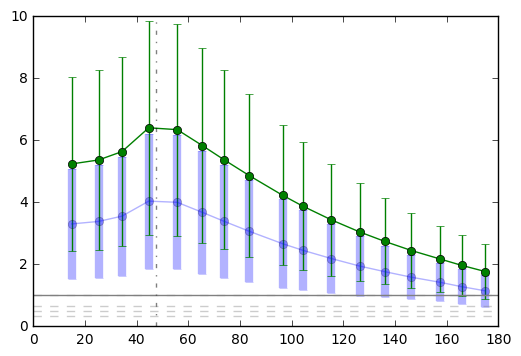

In [98]:
%%time

plot_param_depend(ax=plt.gca(), data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='H maxdisc', N = 10,
                  total_gas_data=zip(r_HI_dens, [He_coeff*(y_interp_(l[0]) + l[1]) for l in zip(r_HI_dens, HI_dens)])[1:18], 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=map(lambda c: lambda l: surf_density(mu_disc(l, mu0=mu0d_H, h=h_disc_H), c, 'H'), np.linspace(1., 12., 10)), 
                  star_density_min=map(lambda c: lambda l: surf_density(mu_disc(l, mu0=mu0d_H, h=h_disc_H), c, 'H'), np.linspace(1., 12., 10)));

Замена spl_gas на gas_approx:

Wall time: 38.2 s


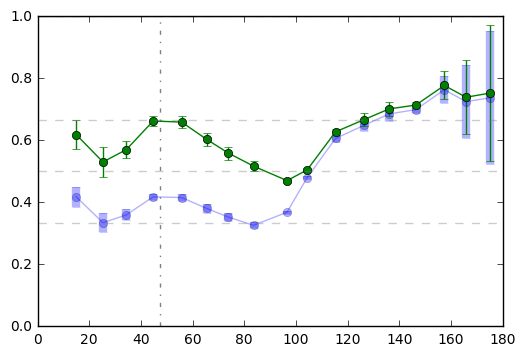

In [99]:
%%time

plot_param_depend(ax=plt.gca(), data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='H maxdisc', N = 2,
                  total_gas_data=zip(r_HI_dens, [He_coeff*(y_interp_(l[0]) + l[1]) for l in zip(r_HI_dens, HI_dens)])[1:18], 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=[spl_gas, gas_approx], 
                  sound_vel=sound_vel, 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=0.68, band='H'), 
                  star_density_min=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=0.68, band='H'));

Разные реалистичные дисперсии: 

Wall time: 3min 18s


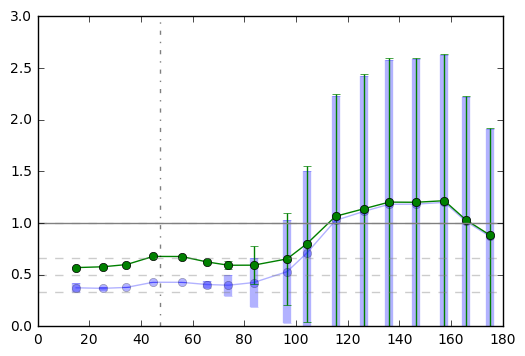

In [100]:
%%time

plot_param_depend(ax=plt.gca(), data_lim=data_lim, color='g', alpha=0.3, disk_scales=disk_scales, label='H maxdisc', N = 10,
                  total_gas_data=zip(r_HI_dens, [He_coeff*(y_interp_(l[0]) + l[1]) for l in zip(r_HI_dens, HI_dens)])[1:18], 
                  epicycl=epicyclicFreq_real, 
                  gas_approx=spl_gas, 
                  sound_vel=[[c*np.exp(-2*l/r25) if l < r25 else c*np.exp(-2.) for l in r_g_dens[1:]] for c in list(np.linspace(6., 100., 10))], 
                  scale=scale, 
                  sigma_max=sig_R_maj_max, 
                  sigma_min=sig_R_maj_min, 
                  star_density_max=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=0.68, band='H'), 
                  star_density_min=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=0.68, band='H'));

### Влияние наклона на результат

Необходимо узнать, как влияет разброс у гле наклона на итоговый результат. К сожалению кроме как вручную это сложно сделать.

С кривой вращения тут все сложно

In [345]:
R25 = 25.91

r_hi, vel_hi = zip(*np.loadtxt("HI_rot.dat", float, delimiter=','))
r_n, vel_n = zip(*np.loadtxt("noord_rot.dat", float, delimiter=','))
vel_n = map(lambda l: l-1208., vel_n)
r_n, vel_n = zip(*sorted(zip(np.abs(r_n), np.abs(vel_n))))
r_n = [l*60 for l in r_n]

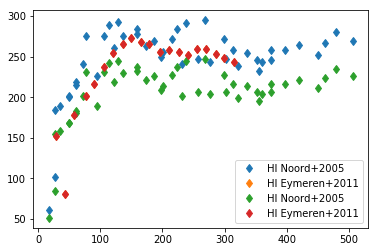

In [346]:
for ind, i in enumerate([44., 56.]):
    incl = i
    sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)
    plt.plot(r_n, [l/sin_i for l in vel_n], 'd', label='HI Noord+2005')
    plt.plot([l*R25/scale for l in r_hi], vel_hi, 'd', label='HI Eymeren+2011')
plt.legend(loc='lower right');

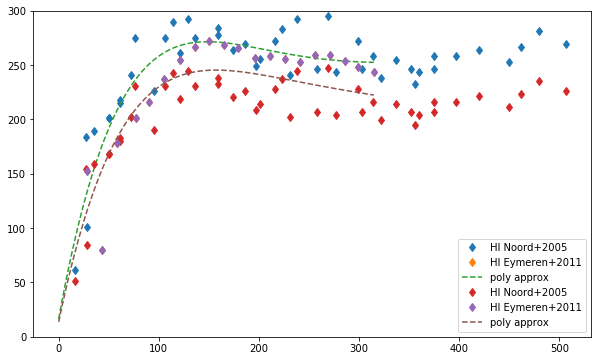

In [347]:
fig = plt.figure(figsize=[10,6])

gas_approxes = []
for ind, i in enumerate([44., 56.]):
    incl = i
    sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

    r_hi_ = [l*R25/scale for l in r_hi]
    vel_n_ = [l/sin_i for l in vel_n]

    _1,_2, = [0.0,],[0.0,]
    _1.extend(r_hi_[1:])
    _2.extend(vel_hi[1:])
    _1.extend(r_n)
    _2.extend(vel_n_)
    _1,_2 = zip(*sorted(zip(_1,_2)))

    plt.plot(r_n, [l/sin_i for l in vel_n], 'd', label='HI Noord+2005')
    plt.plot([l*R25/scale for l in r_hi], vel_hi, 'd', label='HI Eymeren+2011')

    gas_approx = poly1d(polyfit(_1, _2, deg=5))
    test_points = np.linspace(0, max(r_hi_), 100)
    plt.plot(test_points, gas_approx(test_points), '--', label='poly approx')
    gas_approxes.append(gas_approx)

#     spl_gas = inter.UnivariateSpline(_1, _2, k=3, s=2000.)
#     plt.plot(test_points, spl_gas(test_points), '-', label='spline')


plt.ylim(0, 300)
plt.legend(loc='lower right');

132.861676053
114.842348129


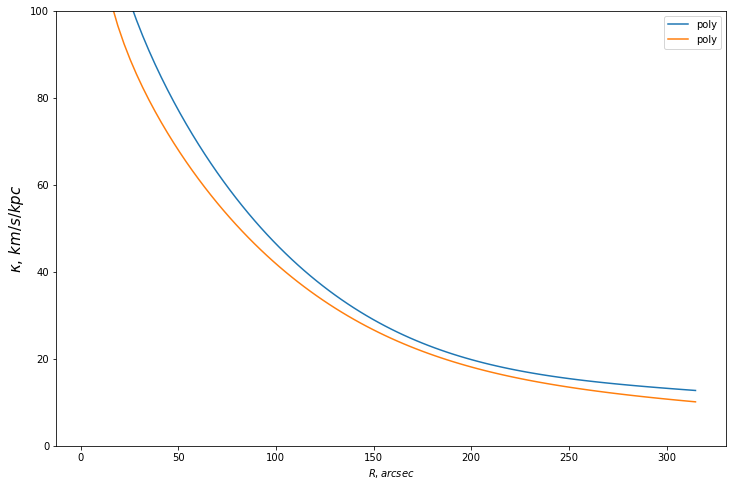

In [348]:
fig = plt.figure(figsize=[12, 8])
for ind, i in enumerate([44., 56.]):
    incl = i
    sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)
    plt.plot(test_points, [epicyclicFreq_real(gas_approxes[ind], x, scale) for x in test_points], '-', label='poly')
#     plt.plot(test_points, [epicyclicFreq_real(spl_gases[ind], x, scale) for x in test_points], '-', label='spline')
    print epicyclicFreq_real(gas_approxes[ind], 10., scale)

plt.xlabel('$R, arcsec$')
plt.ylabel('$\kappa,\, km/s/kpc$', fontsize=15)
plt.ylim(0, 100)
plt.legend();

In [349]:
print 120.08/105.0, np.sin(56.*np.pi/180.)/np.sin(44.*np.pi/180.)

1.14361904762 1.19344645917


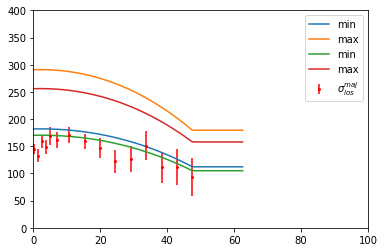

In [350]:
plt.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$')
for ind, i in enumerate([44., 56.]):
    incl = i
    sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)
#     plt.plot(points, map(sig_R_maj_minmin, points), label = 'minmin')
    plt.plot(points, map(sig_R_maj_min, points), label = 'min')
    plt.plot(points, map(sig_R_maj_max, points), label = 'max')
#     plt.plot(points, map(sig_R_maj_maxmax, points), label = 'maxmax')
#     plt.plot(points, map(sig_R_maj_maxmaxtrue, points), label = 'maxmaxtrue')

plt.legend()
plt.ylim(0,400)
plt.xlim(0,100);

In [351]:
#     plot_2f_vs_1f(ax=axes[4], total_gas_data=zip(r_g_dens, map(lambda l: l, gas_dens))[:15], epicycl=epicyclicFreq_real, 
#               gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
#               sigma_max=sig_R_maj_max, 
#               sigma_min=sig_R_maj_min, 
#               star_density_max=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=0.68, band='H'), 
#               star_density_min=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=0.68, band='H'), 
#               data_lim=data_lim, color='y', alpha=0.3, disk_scales=disk_scales, label='H Heidt maxdisc')
    
#     plot_2f_vs_1f(ax=axes[4], total_gas_data=zip(r_g_dens, map(lambda l: l, gas_dens))[:15], epicycl=epicyclicFreq_real, 
#               gas_approx=spl_gas, sound_vel=sound_vel, scale=scale, 
#               sigma_max=sig_R_maj_max, 
#               sigma_min=sig_R_maj_min, 
#               star_density_max=lambda l: s4g_surf_density(mu_disc(l, mu0=mu0d_s4g, h=h_disc_s4g), 1.61), 
#               star_density_min=lambda l: s4g_surf_density(mu_disc(l, mu0=mu0d_s4g, h=h_disc_s4g), 1.61), 
#               data_lim=data_lim, color='g', alpha=0.2, disk_scales=disk_scales, label='S4G maxdisc')

In [353]:
max_coeffs_incl = []

for ind, i in enumerate([44., 56.]):
    incl = i
    sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

    max_coeffs = {}

    for photom in all_photometry:
        disc_max = 2.2*photom[5]
        max_coeff = 0.85*gas_approxes[ind](disc_max)/disc_vel(disc_max, photom[7](0), photom[5], scale)
        submax_coeff = 0.6*gas_approxes[ind](disc_max)/disc_vel(disc_max, photom[7](0), photom[5], scale)

        print '{:15s}: M/L was {:2.2f} and for max it equal {:2.2f}, for submax equal {:2.2f}'.format(photom[0], photom[6], photom[6]*max_coeff**2, photom[6]*submax_coeff**2)
        max_coeffs[photom[0]] = [photom[6]*max_coeff**2, photom[6]*submax_coeff**2]
        
    max_coeffs_incl.append(max_coeffs)

S4G 3.6        : M/L was 0.68 and for max it equal 1.87, for submax equal 0.93
Heidt J        : M/L was 0.75 and for max it equal 1.16, for submax equal 0.58
Heidt H        : M/L was 0.69 and for max it equal 0.84, for submax equal 0.42
Heidt K        : M/L was 0.65 and for max it equal 0.75, for submax equal 0.37
infra 3.6      : M/L was 0.68 and for max it equal 0.90, for submax equal 0.45
infra 3.6 face-on: M/L was 0.68 and for max it equal 1.24, for submax equal 0.62
S4G 3.6        : M/L was 0.68 and for max it equal 1.53, for submax equal 0.76
Heidt J        : M/L was 0.75 and for max it equal 0.93, for submax equal 0.46
Heidt H        : M/L was 0.69 and for max it equal 0.67, for submax equal 0.33
Heidt K        : M/L was 0.65 and for max it equal 0.60, for submax equal 0.30
infra 3.6      : M/L was 0.68 and for max it equal 0.74, for submax equal 0.37
infra 3.6 face-on: M/L was 0.68 and for max it equal 1.32, for submax equal 0.66


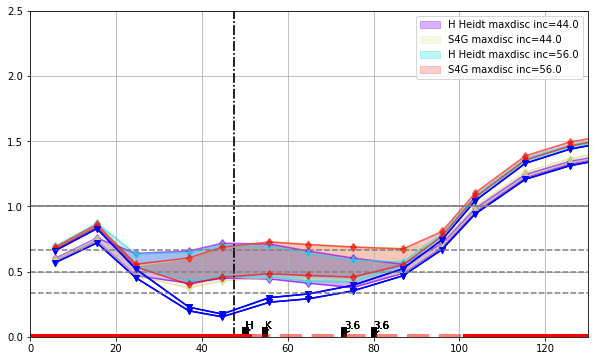

In [355]:
fig = plt.figure(figsize=[10, 6])
ax = plt.gca()

for ind, i in enumerate([44., 56.]):
    incl = i
    sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)
    
    plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, map(lambda l: l, gas_dens))[:15], epicycl=epicyclicFreq_real, 
          gas_approx=gas_approxes[ind], sound_vel=sound_vel, scale=scale, 
          sigma_max=sig_R_maj_max, 
          sigma_min=sig_R_maj_min, 
          star_density_max=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=max_coeffs_incl[ind]['Heidt H'][0], band='H'), 
          star_density_min=lambda l: surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=max_coeffs_incl[ind]['Heidt H'][0], band='H'), 
          data_lim=data_lim, color=cm.rainbow(np.linspace(0, 1, 4))[ind], alpha=0.3, disk_scales=disk_scales, label='H Heidt maxdisc inc={}'.format(incl))
    
    plot_2f_vs_1f(ax=ax, total_gas_data=zip(r_g_dens, map(lambda l: l, gas_dens))[:15], epicycl=epicyclicFreq_real, 
              gas_approx=gas_approxes[ind], sound_vel=sound_vel, scale=scale, 
              sigma_max=sig_R_maj_max, 
              sigma_min=sig_R_maj_min, 
              star_density_max=lambda l: s4g_surf_density(mu_disc(l, mu0=mu0d_s4g, h=h_disc_s4g), max_coeffs_incl[ind]['S4G 3.6'][0]), 
              star_density_min=lambda l: s4g_surf_density(mu_disc(l, mu0=mu0d_s4g, h=h_disc_s4g), max_coeffs_incl[ind]['S4G 3.6'][0]), 
              data_lim=data_lim, color=cm.rainbow(np.linspace(0, 1, 4))[ind+2], alpha=0.2, disk_scales=disk_scales, label='S4G maxdisc inc={}'.format(incl))
    
plt.ylim(0., 2.5)
plt.xlim(0, 130)
plt.axhline(y=1., ls='-', color='grey')
plot_SF(ax)
plt.grid()
plt.savefig('..\\..\pics\\incl_summary\\'+name+'.png', format='png', bbox_inches='tight');

In [356]:
incl = 50.
sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)

### Картинки для статьи

In [91]:
import matplotlib as mpl
mpl.style.use('classic')

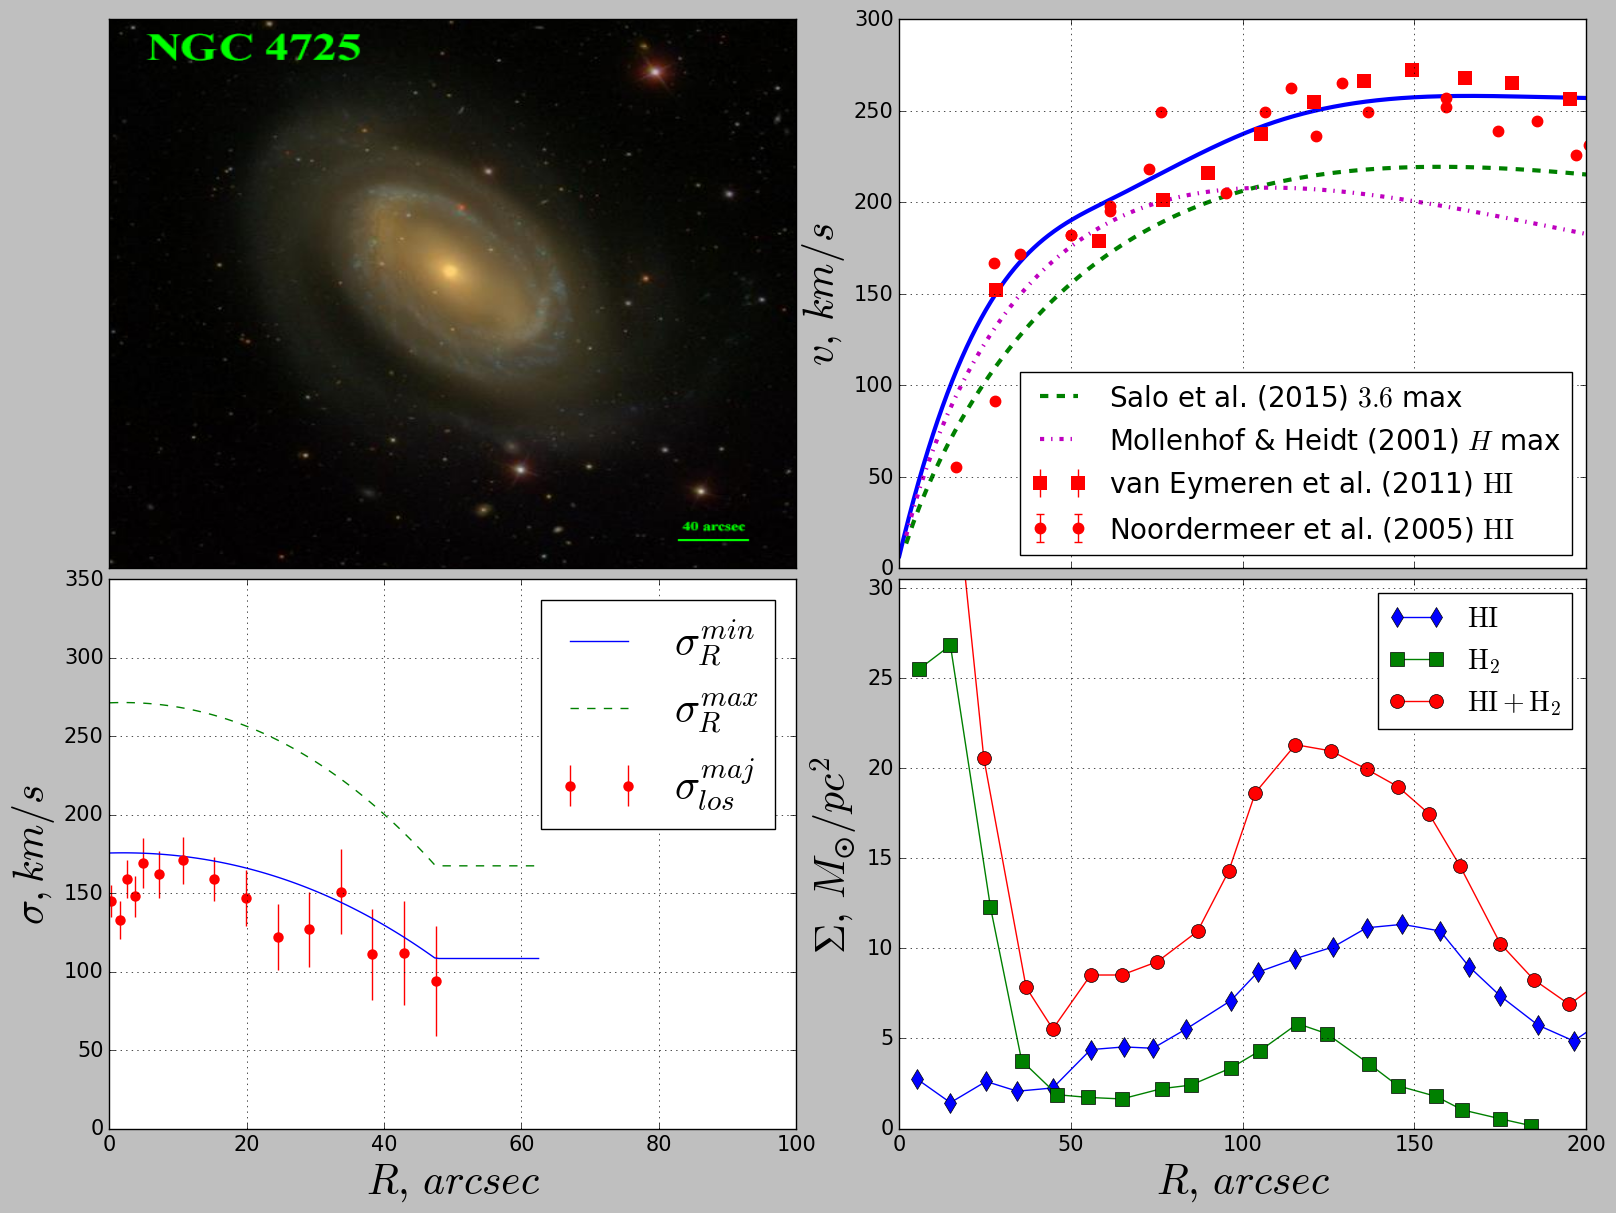

In [91]:
fig = plt.figure(figsize=[16, 12])

ax = plt.subplot2grid((2,2), (0, 0))
ax.imshow(ImagePIL.open('n4725_SDSS_labeled.jpg'), aspect='auto')
ax.imshow(ImagePIL.open('sdss4725.png'), aspect='auto')
ax.set_xticks([])
ax.set_yticks([])

ax = plt.subplot2grid((2,2), (1, 0))
ax.errorbar(r_sig_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='red', label='$\sigma_{los}^{maj}$', ms=15)
ax.plot(points, map(sig_R_maj_min, points), label=r'$\sigma_R^{min}$')
ax.plot(points, map(sig_R_maj_max, points), '--', label=r'$\sigma_R^{max}$')
ax.legend(fontsize=30)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

ax.set_ylim(0,350)
ax.set_xlim(0, 100)  
ax.set_ylabel(r'$\sigma, km/s$', fontsize=30)
ax.set_xlabel(r'$R,\,arcsec$', fontsize=30)
ax.grid()

ax = plt.subplot2grid((2,2), (1, 1))

ax.plot(r_HI_dens, HI_dens, 'd-', label=r'$\rm{HI}$', ms=10)
ax.plot(r_mol_dens, mol_dens, 's-', label=r'$\rm{H_2}$', ms=10)
ax.plot(r_g_dens, gas_dens, 'o-', label=r'$\rm{HI+H_2}$', ms=10);

# ax.plot(r_g_dens, gas_dens, 'd-', label=r'$\rm{HI}$', ms=10)
# ax.plot(r_g_dens, [y_interp_(l, h_disc_R) for l in r_g_dens], '--', label=r'$\rm{H_2}$')
# ax.plot(r_g_dens, [He_coeff*(y_interp_(l[0], h_disc_R) + l[1]) for l in zip(r_g_dens, gas_dens)], 'o-', label=r'$\rm{HI+H_2}$', ms=10)
ax.grid()
ax.set_xlim(0, 200)
ax.set_ylim(0, 30.5)
ax.legend(fontsize=20)

ax.set_ylabel(u'$\Sigma,\,M_\u2609/pc^2$', fontsize=30)
ax.set_xlabel(r'$R,\,arcsec$', fontsize=30)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

ax = plt.subplot2grid((2,2), (0, 1))
# ax.errorbar(r_wsrt, vel_wsrt, yerr=e_vel_wsrt, fmt='.', marker='.', mew=1, label = 'data', ms=15, color='red')
# plt.plot(r_wsrt, vel_wsrt, '.', label="gas Struve")
# plt.plot(r_noord, vel_noord, '^', label=r"Noordermeer et al. (2007)")
r_hi, vel_hi = zip(*np.loadtxt("HI_rot.dat", float, delimiter=','))
r_hi = [l*R25/calc_scale(18.2) for l in r_hi]
# plt.plot(r_hi, vel_hi, 'd', label=r'van Eymeren et al. (2011) $\rm{HI}$')
ax.errorbar(r_hi, vel_hi, yerr=[0.]*len(r_hi), fmt='.', marker='s', mew=0, label = r'van Eymeren et al. (2011) $\rm{HI}$', ms=10, color='red')

r_n, vel_n = zip(*np.loadtxt("noord_rot.dat", float, delimiter=','))
vel_n = map(lambda l: l-1208., vel_n)
r_n, vel_n = zip(*sorted(zip(np.abs(r_n), np.abs(vel_n))))
r_n = [l*60 for l in r_n]
vel_n = [l/sin_i for l in vel_n]
# plt.plot(r_n, vel_n, 'v', label=r'Noordermeer et al. (2005) $\rm{HI}$')
ax.errorbar(r_n, vel_n, yerr=[0.]*len(r_n), fmt='.', marker='.', mew=1, label = r'Noordermeer et al. (2005) $\rm{HI}$', ms=15, color='red')

ax.plot(test_points, spl_gas(test_points), '-', lw=3, color='b')


# ax.plot(test_points, 0.85*spl_gas(test_points), '--', label='max disc limit')

# ax.plot(r, vel, '.', label = 'Noord thesis')
test_points = np.linspace(0, 200., 100)
max_coeffs = {}
for ind, photom in enumerate(all_photometry):
    if photom[0] in ['Heidt H', 'S4G 3.6']:
        disc_max = 2.2*photom[5]
        max_coeff = 0.85*spl_gas(disc_max)/disc_vel(disc_max, photom[7](0), photom[5], scale)
        submax_coeff = 0.6*spl_gas(disc_max)/disc_vel(disc_max, photom[7](0), photom[5], scale)

        if type(photom[5]) == tuple:
            ax.plot(test_points, map(lambda l: disc_vel(l, max_coeff**2 *photom[7][0](0), photom[5][0], scale, 
                                                         Sigma0_2=max_coeff**2 *photom[7][1](0), h_2=photom[5][1]), test_points), '--', label=r'Gutierrez (2011) $R$', lw=3)
        else:
            if photom[0] == 'Heidt H':
                ax.plot(test_points, map(lambda l: disc_vel(l, max_coeff**2 * photom[7](0), photom[5], scale), test_points), 
                        '-.', label=r'Mollenhof & Heidt (2001) $H$ max', lw=3, color='m')
            else:
                ax.plot(test_points, map(lambda l: disc_vel(l, max_coeff**2 * photom[7](0), photom[5], scale), test_points), 
                        '--', label=r'Salo et al. (2015) $3.6$ max', lw=3, color='g')
        

ax.grid(linewidth=0.5)
ax.set_ylim(0, 300)
ax.set_xlim(0, 200)
ax.legend(fontsize=20, loc='lower right')
ax.set_ylabel(r'$v,\,km/s$', fontsize=30)
# ax.set_xlabel(r'$R,\,arcsec$', fontsize=20)

# for tick in ax.yaxis.get_major_ticks():
#     tick.label.set_fontsize(12)
# for tick in ax.xaxis.get_major_ticks():
#     tick.label.set_fontsize(12)
ax.set_xticklabels([])
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
fig.subplots_adjust(wspace=0.15, hspace=0.02)
plt.savefig(paper_imgs_dir+'4725_obs_data.eps', format='eps', bbox_inches='tight')
plt.savefig(paper_imgs_dir+'4725_obs_data.png', format='png', bbox_inches='tight')
plt.savefig(paper_imgs_dir+'4725_obs_data.pdf', format='pdf', dpi=150, bbox_inches='tight')
plt.show()

Вид со спиралями:

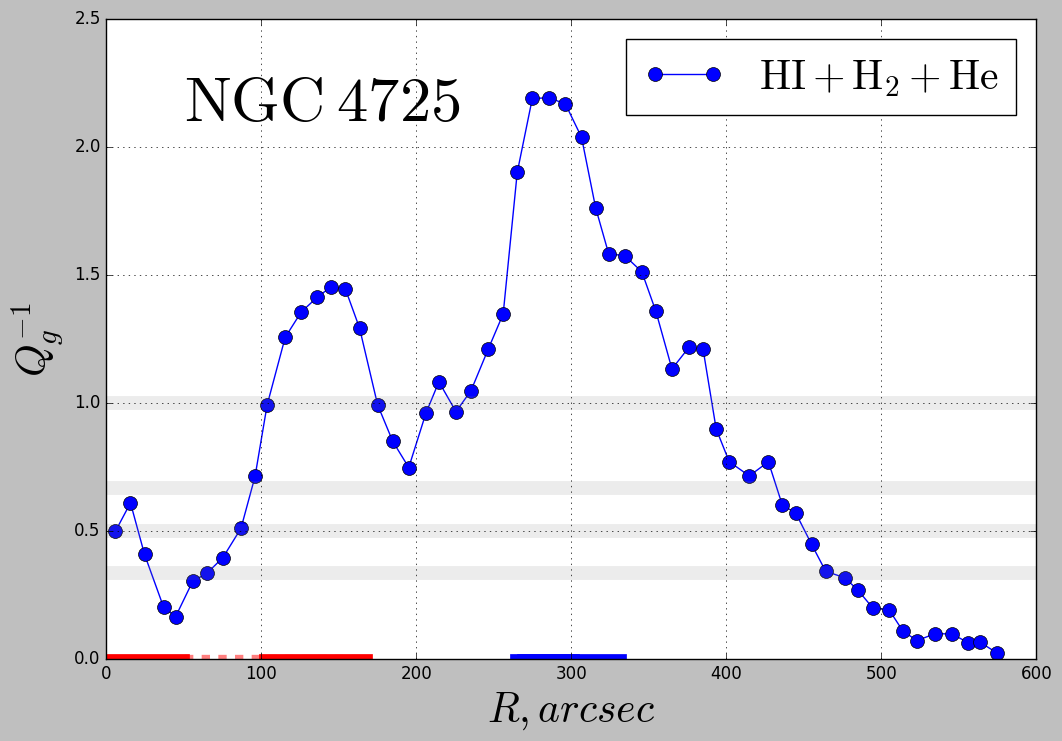

In [93]:
fig = plt.figure(figsize=[12, 8])

# plt.plot(r_HI_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=l[1]) for l in 
#                     zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], HI_dens)], 'o-', label=r'$\rm{HI}$', color='b', ms=10)
plt.plot(r_g_dens, [1./Qg(epicycl=l[0], sound_vel=sound_vel, gas_density=l[1]) for l in 
                    zip([epicyclicFreq_real(spl_gas, x, scale) for x in r_g_dens], gas_dens)], 'o-', label=r'$\rm{HI}+\rm{H_2}+\rm{He}$', color='b', ms=10)

# plt.axhline(y=1, ls='--')
plt.legend(fontsize=30, loc='upper right')
plot_SF(plt.gca())
plt.gca().plot([285./238 *220., 330./238 *240], [0., 0.], '-', lw=7., color='b') #внешняя спираль, ширина условна

plt.ylabel('$Q^{-1}$', fontsize=15)
# plt.title(name)
for q_ in [1., 1.5, 2., 3.]:
    plt.axhline(y=1./q_, lw=10, alpha=0.15, color='grey')
plt.grid()
# plt.ylim(0, 1.2)
# plt.savefig('..\\..\pics\\instab_spirals\\'+name+'_spiral'+'.png', format='png', bbox_inches='tight')
ax = plt.gca()
ax.set_xlabel(r'$R, arcsec$', fontsize=30)
ax.set_ylabel(r'$Q_{g}^{-1}$', fontsize=30)
ax.text(50, 2.1, r'$\rm{NGC\:4725}}$', fontsize=45)
plt.savefig(paper_imgs_dir+'4725_spiral.eps', format='eps', bbox_inches='tight')
plt.savefig(paper_imgs_dir+'4725_spiral.png', format='png', bbox_inches='tight')
plt.savefig(paper_imgs_dir+'4725_spiral.pdf', format='pdf', dpi=150, bbox_inches='tight')
plt.show()

## Эксперименты

### WKB приближение

Проверим применимость WKB приближения, т.е. $k\times r \gg 1$:

Для $H$:

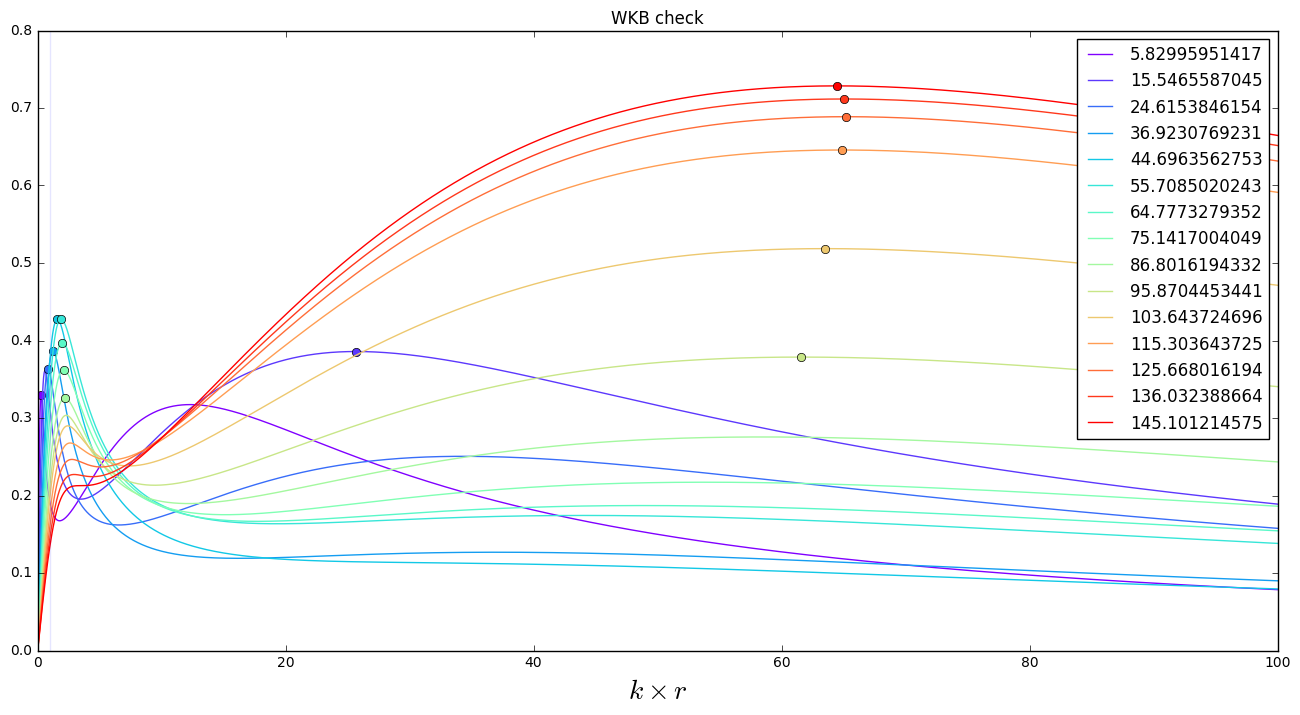

In [97]:
plot_WKB_dependencies(r_g_dens=r_g_dens[:15], 
                    gas_dens=map(lambda l: l, gas_dens)[:15], 
                    epicycl=lambda l: epicyclicFreq_real(spl_gas, l, scale), 
                    sound_vel=sound_vel,
                    star_density=[surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=0.68, band='H') for l in r_g_dens[:15]], 
                    sigma=sig_R_maj_max, 
                    scale=scale,
                    krange=arange(0.01, 1000, 0.01))
plt.xlabel(r'$k\times r$', fontsize=20)
plt.title('WKB check')
plt.axvline(x=1, alpha=0.1)
plt.xlim(0, 100);

Исходная зависимость:

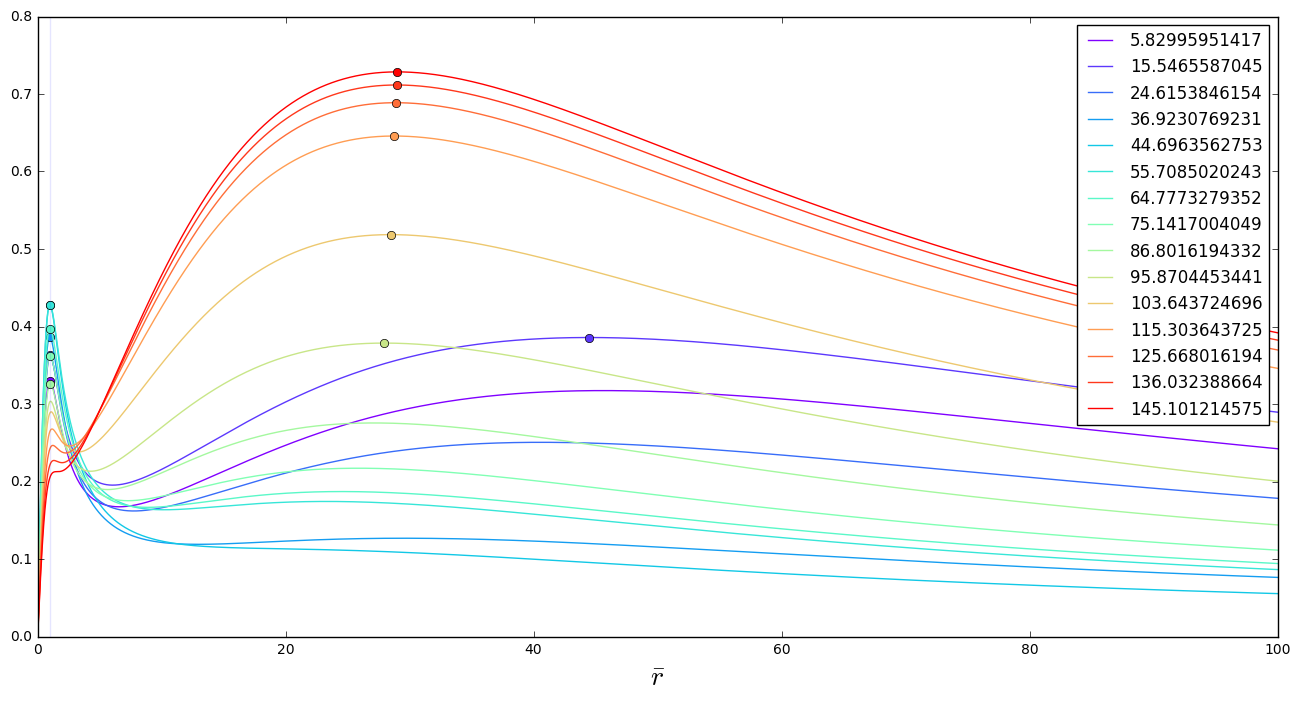

In [98]:
plot_k_dependencies(r_g_dens=r_g_dens[:15], 
                    gas_dens=map(lambda l: l, gas_dens)[:15], 
                    epicycl=lambda l: epicyclicFreq_real(spl_gas, l, scale), 
                    sound_vel=sound_vel,
                    star_density=[surf_density(mu=mu_disc(l, mu0=mu0d_H, h=h_disc_H), M_to_L=0.68, band='H') for l in r_g_dens[:15]], 
                    sigma=sig_R_maj_max,
                    krange=arange(0.01, 1000, 0.01))
plt.xlabel(r'$\bar{r}$', fontsize=20)
plt.axvline(x=1, alpha=0.1)
plt.xlim(0, 100);

Для $S^4G$:

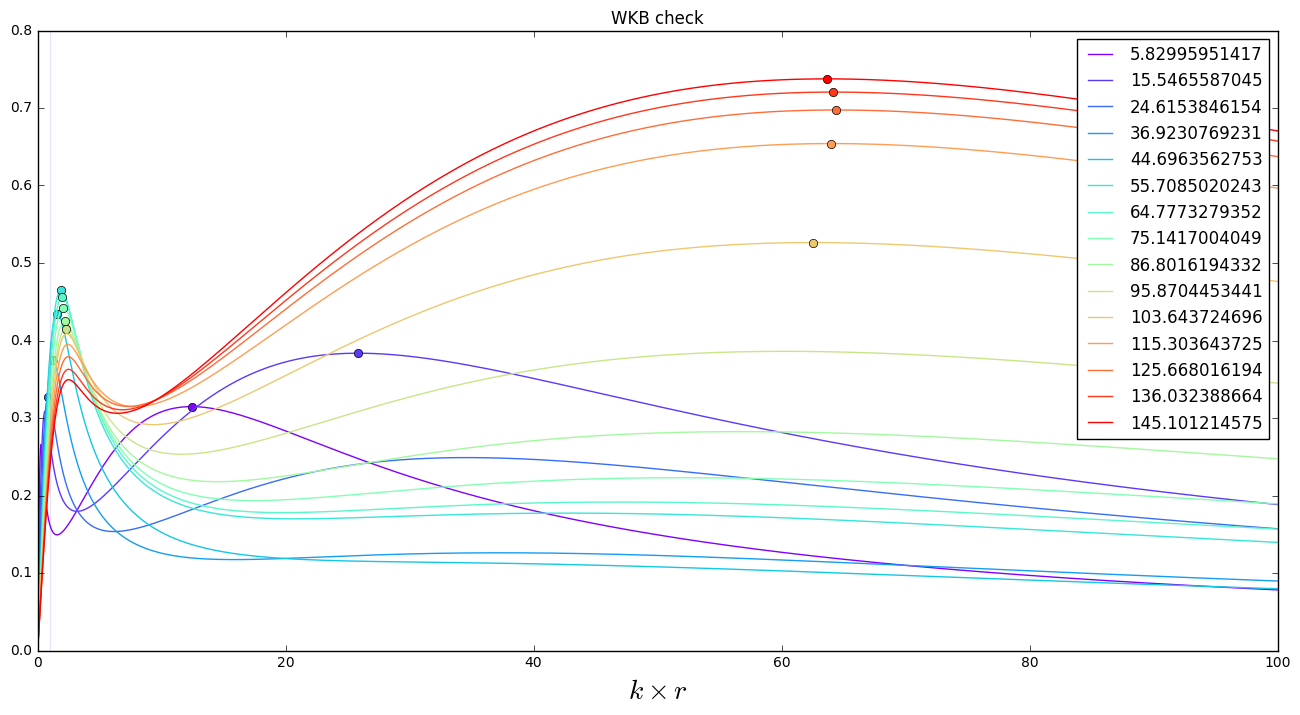

In [99]:
plot_WKB_dependencies(r_g_dens=r_g_dens[:15], 
                    gas_dens=map(lambda l: l, gas_dens)[:15], 
                    epicycl=lambda l: epicyclicFreq_real(spl_gas, l, scale), 
                    sound_vel=sound_vel,
                    star_density=[s4g_surf_density(mu_disc(l, mu0=mu0d_s4g, h=h_disc_s4g), 1.61) for l in r_g_dens[:15]], 
                    sigma=sig_R_maj_max, 
                    scale=scale,
                    krange=arange(0.01, 1000, 0.01))
plt.xlabel(r'$k\times r$', fontsize=20)
plt.title('WKB check')
plt.axvline(x=1, alpha=0.1)
plt.xlim(0, 100);

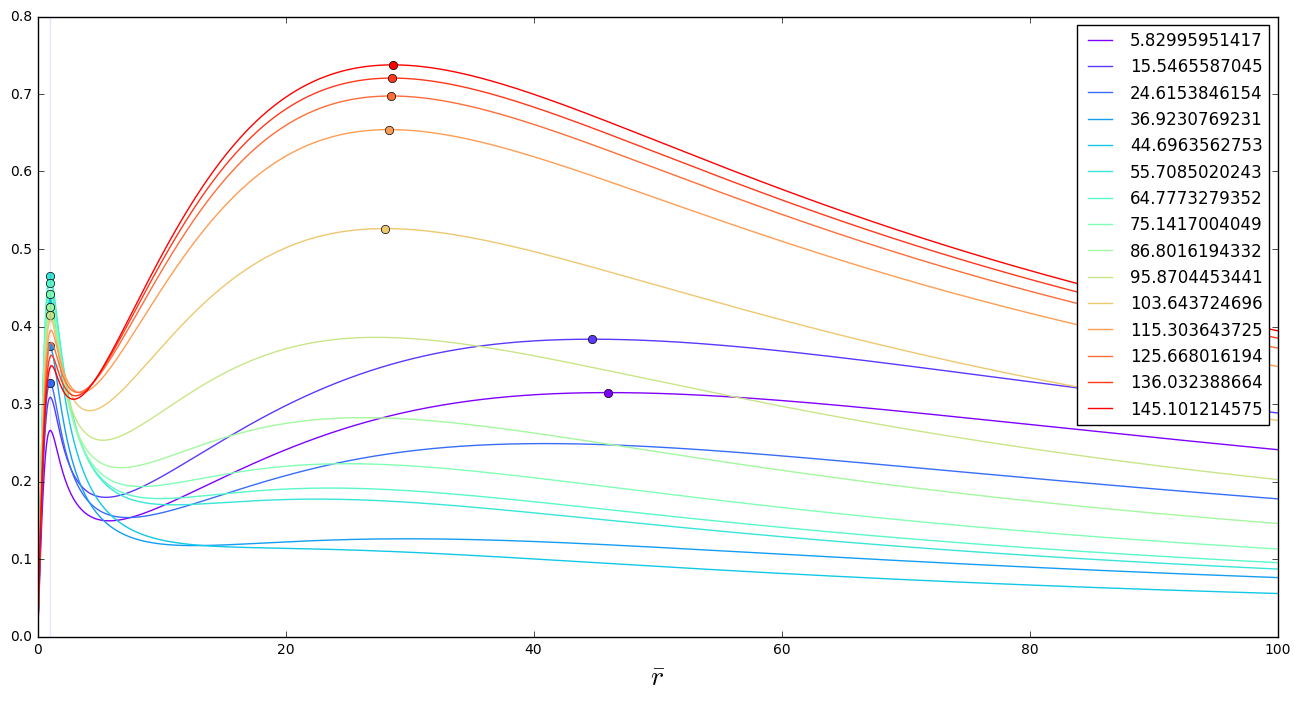

In [100]:
plot_k_dependencies(r_g_dens=r_g_dens[:15], 
                    gas_dens=map(lambda l: l, gas_dens)[:15], 
                    epicycl=lambda l: epicyclicFreq_real(spl_gas, l, scale), 
                    sound_vel=sound_vel,
                    star_density=[s4g_surf_density(mu_disc(l, mu0=mu0d_s4g, h=h_disc_s4g), 1.61) for l in r_g_dens[:15]], 
                    sigma=sig_R_maj_max,
                    krange=arange(0.01, 1000, 0.01))
plt.xlabel(r'$\bar{r}$', fontsize=20)
plt.axvline(x=1, alpha=0.1)
plt.xlim(0, 100);

### Учет толщины

$$\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{s}}}{\kappa+k^{2}\sigma_{\mathrm{s}}}\,\left\{ \frac{1-\exp(-k\, h_{z}^{\mathrm{s}})}{k\, h_{z}^{\mathrm{s}}}\right\} +\frac{2\,\pi\, G\, k\,\Sigma_{\mathrm{g}}}{\kappa+k^{2}c_{\mathrm{g}}}\,\left\{ \frac{1-\exp(-k\, h_{z}^{\mathrm{g}})}{k\, h_{z}^{\mathrm{g}}}\right\} >1$$

$$\begin{array}{rcl}
\sigma_{z}^{2}=\pi Gz_{0}^{\mathrm{s}}(\Sigma_{\mathrm{s}}+\Sigma_{\mathrm{g}})\,,\\
\\
c_{\mathrm{g}}^{2}=\pi Gz_{0}^{\mathrm{g}}(\Sigma_{\mathrm{g}}+\Sigma_{\mathrm{s}})\,.
\end{array}$$

Отсюда можно найти толщины

### Отношение водорода к молекулярному газу

Из https://ui.adsabs.harvard.edu/#abs/2016MNRAS.460.1106W/abstract:
два возможных вида связи между молекулярным и атомарным газом $R_{mol} = \Sigma_{H_2}/\Sigma_{HI}$:

$$R_{mol} = \Sigma_{star}/81$$ или 
$$R_{mol} = \left(\frac{P_h}{1.7 \times 10^4 cm^{-3}K k_B } \right)^{0.8},\, P_h = \frac{\pi}{2}G\Sigma_g(\Sigma_g + \frac{\sigma_g}{\sigma_z}\Sigma_{star})$$

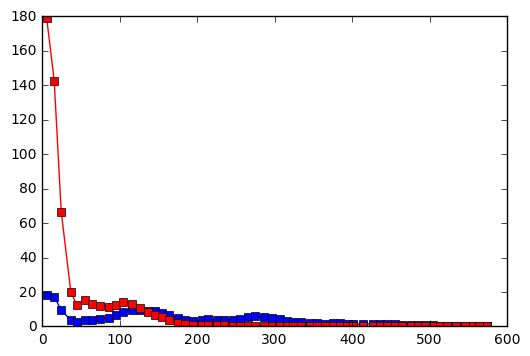

In [101]:
def R1(Sigma_star):
    return Sigma_star/81.

def h2_gas(r, h_gas_dens):
    return R1(star_density(r))*h_gas_dens

star_density=lambda l: surf_density(mu_disc(l, mu0=mu0d_K, h=h_disc_K), M_to_L_K, 'K')

plt.plot(r_g_dens, gas_dens, 's-', color='b')
plt.plot(r_g_dens, [h2_gas(_[0], _[1]) for _ in  zip(r_g_dens, gas_dens)], 's-', color='r');

Вторая оценка - малой оси у нас нет и придется вытаскивать из большой:

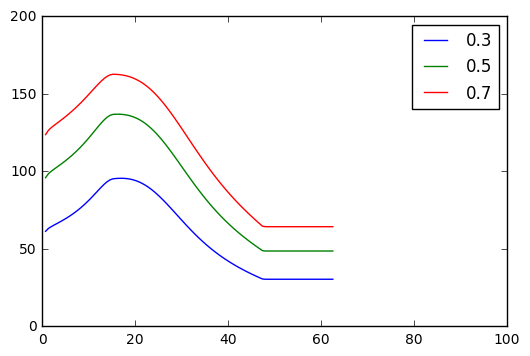

In [102]:
@flat_end(sig_maj_lim)
def sig_R_maj_true(r, alpha, spl_maj=spl_maj):
    return spl_maj(r)/sqrt(sigPhi_to_sigR_real(r)*sin_i**2 + alpha**2 * cos_i**2)

@flat_end(sig_maj_lim)
def sig_z(r, alpha, spl_maj=spl_maj):
    return sig_R_maj_true(r, alpha, spl_maj=spl_maj)*alpha

plt.plot(points, map(lambda l: sig_z(l, 0.3), points), label = '0.3')
plt.plot(points, map(lambda l: sig_z(l, 0.5), points), label = '0.5')
plt.plot(points, map(lambda l: sig_z(l, 0.7), points), label = '0.7')

plt.legend()
plt.ylim(0,200)
plt.xlim(0,100);

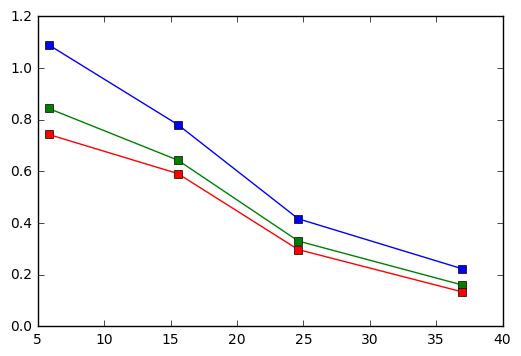

In [103]:
def R2(r, h_gas_dens, alpha, sound_vel):
    G = 6.67408
    kB = 3.7529917
    Ph = np.pi/2. * G * h_gas_dens * (h_gas_dens + sound_vel/sig_z(r, alpha) * star_density(r))
    return np.power(4.363474*Ph/(1.7 * 10000. * kB) , 0.8)

def h2_gas2(r, h_gas_dens, alpha, sound_vel):
    return R2(r, h_gas_dens, alpha, sound_vel)*h_gas_dens

plt.plot(r_g_dens[:4], [R2(_[0], _[1], 0.3, 6.) for _ in  zip(r_g_dens, gas_dens)[:4]], 's-')
plt.plot(r_g_dens[:4], [R2(_[0], _[1], 0.5, 6.) for _ in  zip(r_g_dens, gas_dens)[:4]], 's-')
plt.plot(r_g_dens[:4], [R2(_[0], _[1], 0.7, 6.) for _ in  zip(r_g_dens, gas_dens)[:4]], 's-');

И теперь сравнение с настоящим значением:

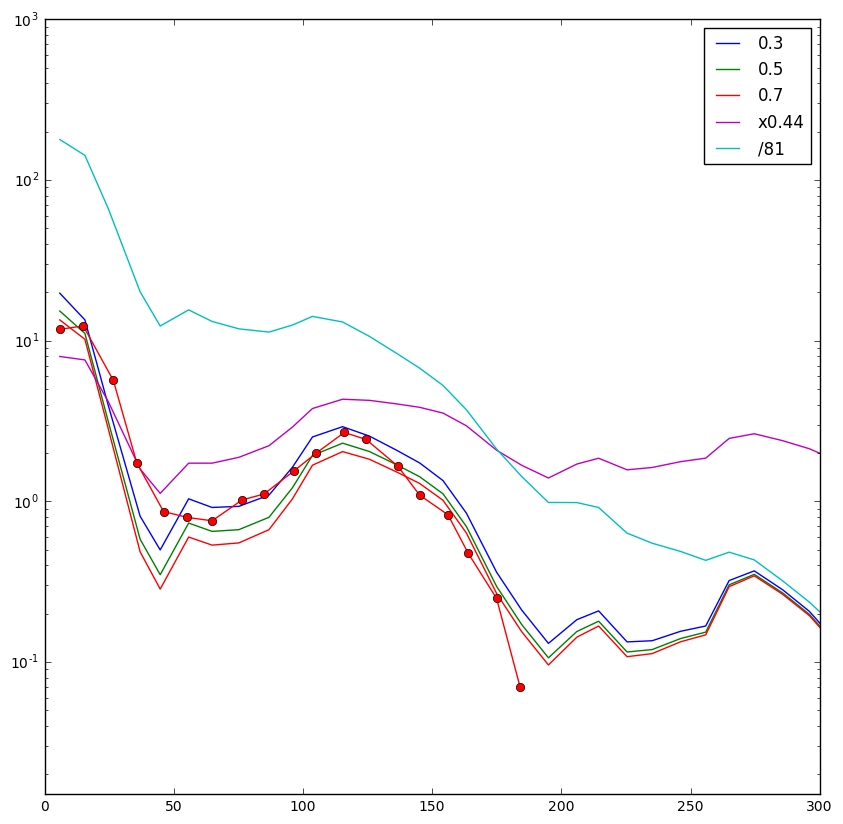

In [104]:
fig = plt.figure(figsize=[10, 10])

# plt.plot(r_g_dens, gas_dens, 's-', color='b')
plt.semilogy(r_g_dens, [h2_gas2(_[0], _[1], 0.3, 6.) for _ in  zip(r_g_dens, gas_dens)], '-', label='0.3')
plt.semilogy(r_g_dens, [h2_gas2(_[0], _[1], 0.5, 6.) for _ in  zip(r_g_dens, gas_dens)], '-', label='0.5')
plt.semilogy(r_g_dens, [h2_gas2(_[0], _[1], 0.7, 6.) for _ in  zip(r_g_dens, gas_dens)], '-', label='0.7')

plt.semilogy(r_g_dens, map(lambda l: 0.44*l, gas_dens), '-', color='m', label='x0.44')
plt.semilogy(r_mol_dens, mol_dens, 'o-', color='r')

plt.semilogy(r_g_dens, [h2_gas(_[0], _[1]) for _ in  zip(r_g_dens, gas_dens)], '-', label='/81')

plt.legend()
plt.ylim(0.015, 1000.)
plt.xlim(0, 300);

В целом и 1.44 и модель с давлением здесь достаточно адекватны.

(надо учесть, что здесь может быть ошибка и относиться с острожностью, например неверно взяты значения атомарного газа - может быть там не убран гелий и т.д.)